# P3 - Open Food Facts - Exploration

## Import

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson

plt.style.use('seaborn')

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\2733391392.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
data = pd.read_csv('../Source/openfoodfacts_clean.csv', sep='\t', low_memory=False)

In [4]:
data.describe(include='all')

code                product_name     brands  \
count   4.506200e+04                       45062      44847   
unique           NaN                       37610       9307   
top              NaN  Huile d'olive vierge extra  Carrefour   
freq             NaN                          39       1792   
mean    3.827056e+12                         NaN        NaN   
std     5.865282e+12                         NaN        NaN   
min     1.000000e+01                         NaN        NaN   
25%     3.228850e+12                         NaN        NaN   
50%     3.281780e+12                         NaN        NaN   
75%     3.596710e+12                         NaN        NaN   
max     3.661112e+14                         NaN        NaN   

       nutrition_grade_fr     pnns_groups_1   energy_100g      fat_100g  \
count               42347             45062  45062.000000  45062.000000   
unique                  5                10           NaN           NaN   
top                     D  collation sucree           NaN           NaN   
freq                11801              7308           NaN           NaN   
mean                  NaN               NaN    266.819421     13.336744   
std                   NaN               NaN    182.813698     16.724349   
min                   NaN               NaN      0.000000      0.000000   
25%                   NaN               NaN    104.923518      1.500000   
50%                   NaN               NaN    247.131931      7.000000   
75%                   NaN               NaN    394.359465     21.000000   
max                   NaN               NaN    901.529637    100.000000   

        saturated_fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count         45062.000000        45062.000000  45062.000000  45061.000000   
unique                 NaN                 NaN           NaN           NaN   
top                    NaN                 NaN           NaN           NaN   
freq                   NaN                 NaN           NaN           NaN   
mean              5.213038           27.702787     12.613585      1.673727   
std               7.812734           27.230485     18.142353      3.220125   
min               0.000000            0.000000      0.000000      0.000000   
25%               0.400000            4.000000      1.100000      0.000000   
50%               2.000000           14.700000      4.000000      0.100000   
75%               7.000000           53.000000     15.800000      2.300000   
max             100.000000          100.000000    100.000000     87.500000   

        proteins_100g  nutrition_score_fr_100g      sel_100g  
count    44946.000000             45062.000000  45062.000000  
unique            NaN                      NaN           NaN  
top               NaN                      NaN           NaN  
freq              NaN                      NaN           NaN  
mean         7.761556                 8.630198      1.072820  
std          7.347867                 8.798688      3.595637  
min          0.000000               -14.000000      0.000000  
25%          2.200000                 1.000000      0.100000  
50%          6.100000                 9.000000      0.600000  
75%         11.000000                15.000000      1.219200  
max         90.000000                40.000000    100.000000

In [5]:
data.columns.tolist()

['code',
 'product_name',
 'brands',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'energy_100g',
 'fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'nutrition_score_fr_100g',
 'sel_100g']

In [6]:
data.dtypes

code                         int64
product_name                object
brands                      object
nutrition_grade_fr          object
pnns_groups_1               object
energy_100g                float64
fat_100g                   float64
saturated_fat_100g         float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
nutrition_score_fr_100g    float64
sel_100g                   float64
dtype: object

# Analyse Univaries

## Variables Quantitatives Continues

In [7]:
def trace_histplot_gen_zoom(
        dataframe,
        variable,
        titre,
        xlabel,
        xlim_bas,
        xlim_haut,
        ylim_bas,
        ylim_haut,
        kde=True,
        mean_median_mode=True,
        mean_median_zoom=False):
    """
    Histplot pour les variables quantitatives général + histplot
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                variable : colonne dont on veut voir les histplot
                titre : titre du graphique (str)
                xlabel:légende des abscisses
                xlim_bas : limite du zoom supérieur bas(int)
                xlim_haut : limite du zoom supérieur haut(int)
                ylim_bas : limite du zoom inférieur bas(int)
                ylim_haut : limite du zoom inférieur haut(int)
                kde : boolean pour tracer la distribution normale
                mean_median_mode : boolean pour tracer la moyenne, médiane et mode
                mean_median_zoom : boolean pour tracer la moyenne et médiane sur le graphique zoomé
    @param OUT :None
    """
    # Distplot général + zoom
    fig = plt.figure(figsize=(15, 6))

    data = dataframe[variable]
    ax1 = fig.add_subplot(1, 2, 1)
    ax1 = sns.histplot(data, kde=kde, color='SteelBlue')
    if mean_median_mode:
        ax1.vlines(data.mean(), *ax1.get_ylim(), color='red', ls='-', lw=1.5)
        ax1.vlines(
            data.median(),
            *ax1.get_ylim(),
            color='green',
            ls='-.',
            lw=1.5)
        ax1.vlines(
            data.mode()[0],
            *ax1.get_ylim(),
            color='goldenrod',
            ls='--',
            lw=1.5)
    ax1.legend(['mean', 'median', 'mode'])
    ax1.set_xlabel(xlabel, fontsize=12)
    ax1.set_ylabel('Nombre', fontsize=12)
    ax1.set_title(titre, fontsize=14)
    plt.grid(False)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = sns.histplot(dataframe[variable], kde=kde, color='SteelBlue')
    if mean_median_zoom:
        ax2.vlines(data.mean(), *ax2.get_ylim(), color='red', ls='-', lw=1.5)
        ax2.vlines(
            data.median(),
            *ax2.get_ylim(),
            color='green',
            ls='-.',
            lw=1.5)
    ax2.set_xlabel(xlabel, fontsize=12)
    ax2.set_ylabel('Nombre', fontsize=12)
    ax2.set_xlim(xlim_bas, xlim_haut)
    ax2.set_ylim(ylim_bas, ylim_haut)
    ax2.set_title(titre + ' Zoom', fontsize=14)
    plt.grid(False)

    plt.show()

In [8]:
def trace_dispersion_boxplot_qqplot(dataframe, variable, titre, unite):
    """
    Suivi des dipsersions : bosplot et qqplot
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                variable : colonne dont on veut voir les outliers
                titre :titre pour les graphiques (str)
                unite : unité pour ylabel boxplot (str)
    @param OUT :None
    """
    # Boxplot + qqplot
    fig = plt.figure(figsize=(15, 6))

    data = dataframe[variable]

    ax1 = fig.add_subplot(1, 2, 1)
    box = sns.boxplot(data=data, color='SteelBlue', ax=ax1)
    box.set(ylabel=unite)

    plt.grid(False)

    ax2 = fig.add_subplot(1, 2, 2)
    ax2 = qqplot(data,
                 line='r',
                 **{'markersize': 5,
                    'markeredgecolor': 'k',
                    'color': 'SteelBlue'},
                 ax=ax2)
    plt.grid(False)

    fig.suptitle(titre, fontweight='bold', size=14)
    plt.show()

## Nutriments

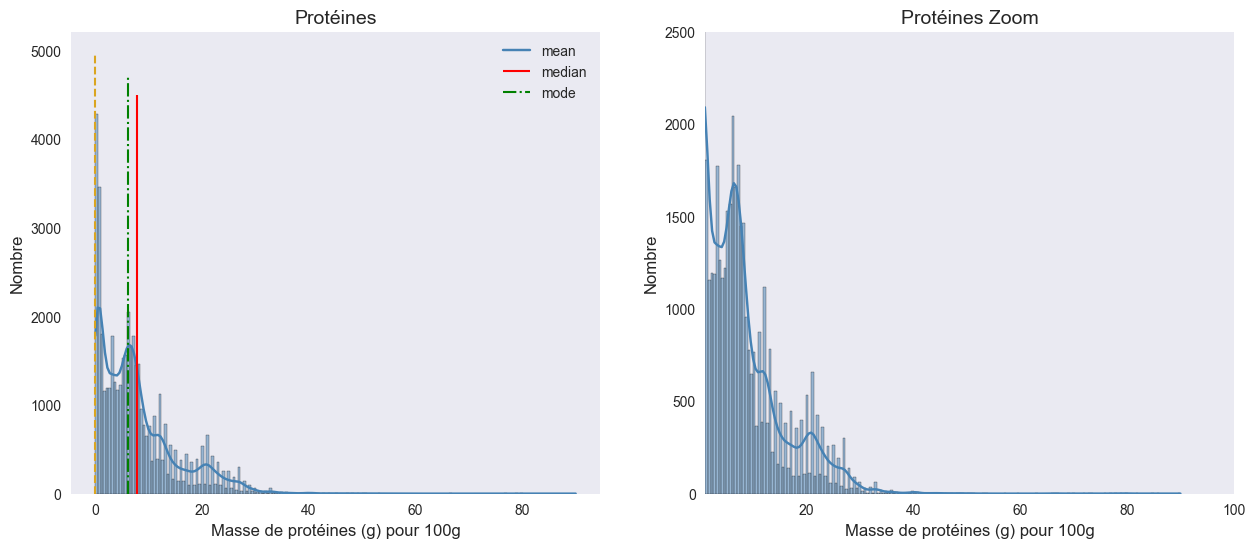

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


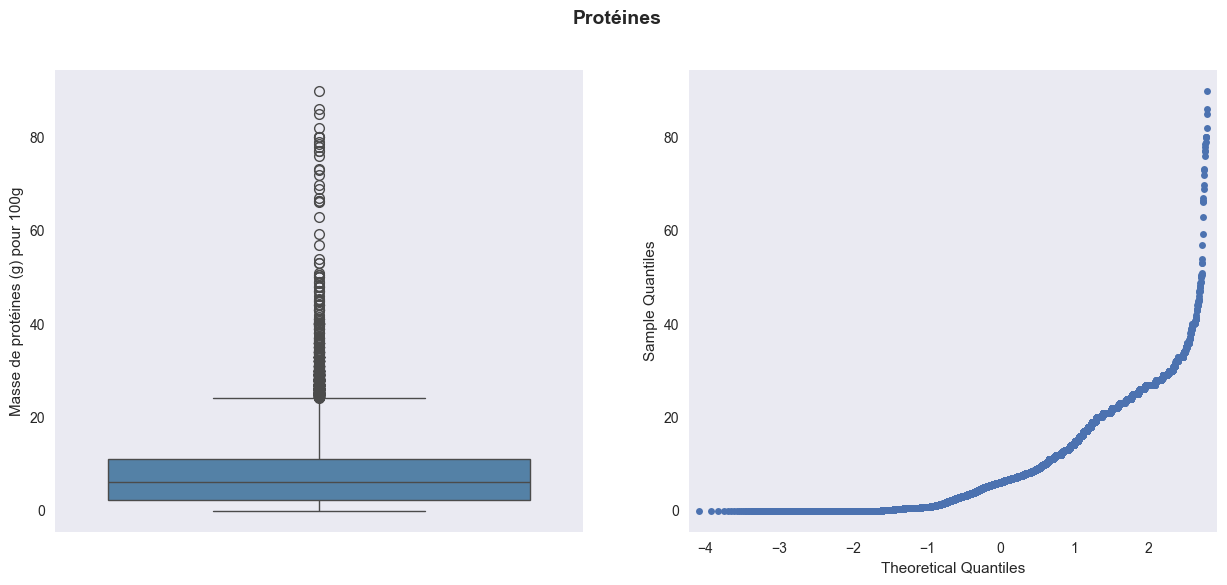

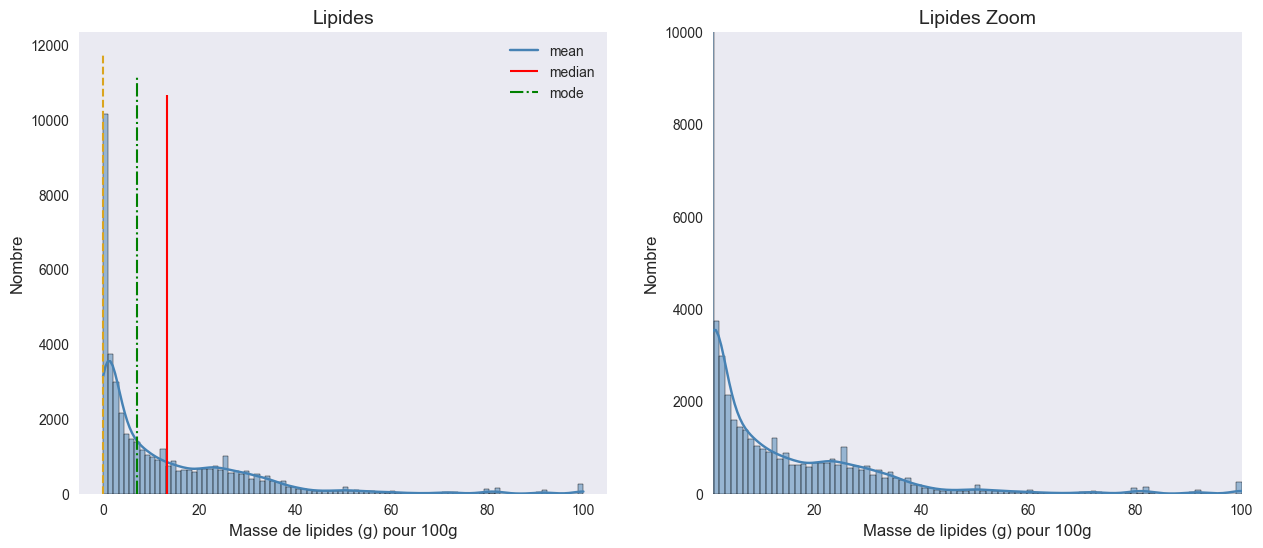

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


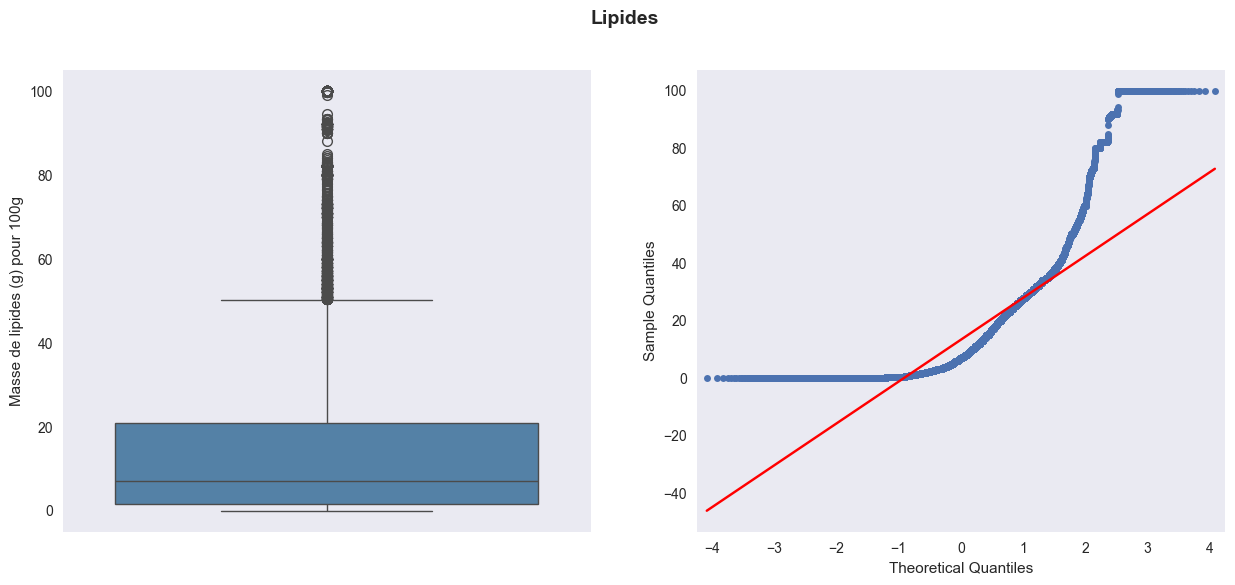

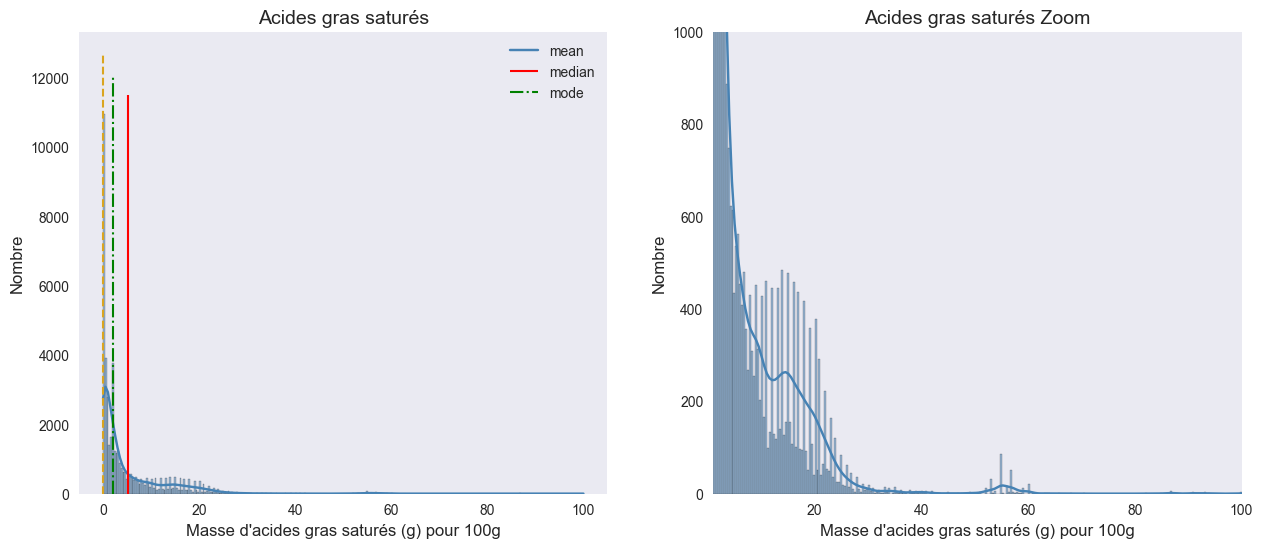

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


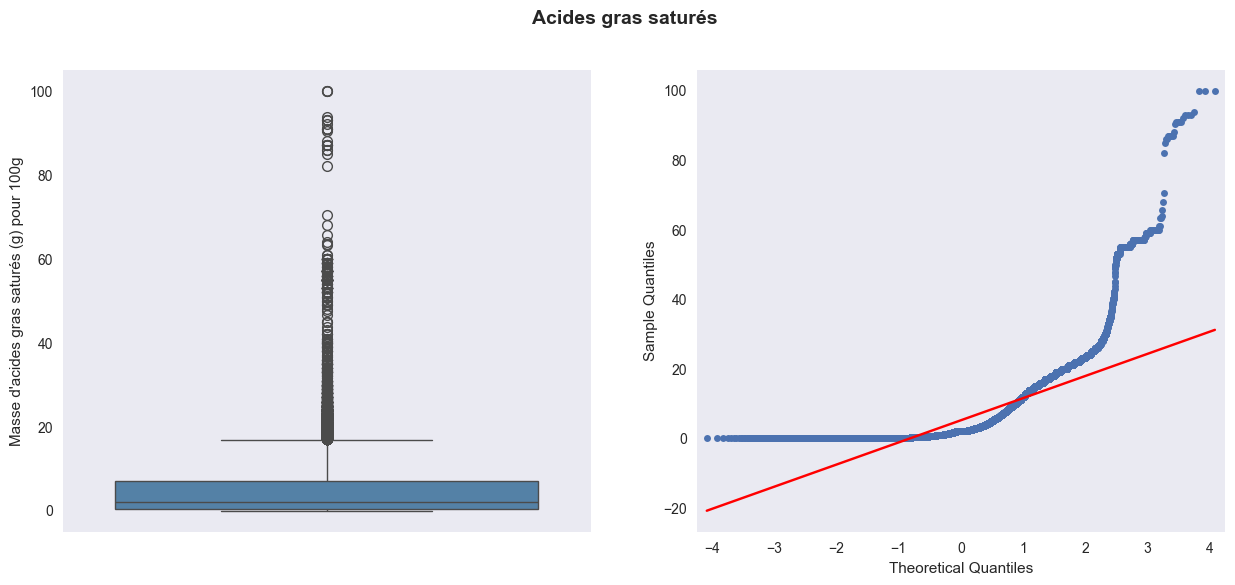

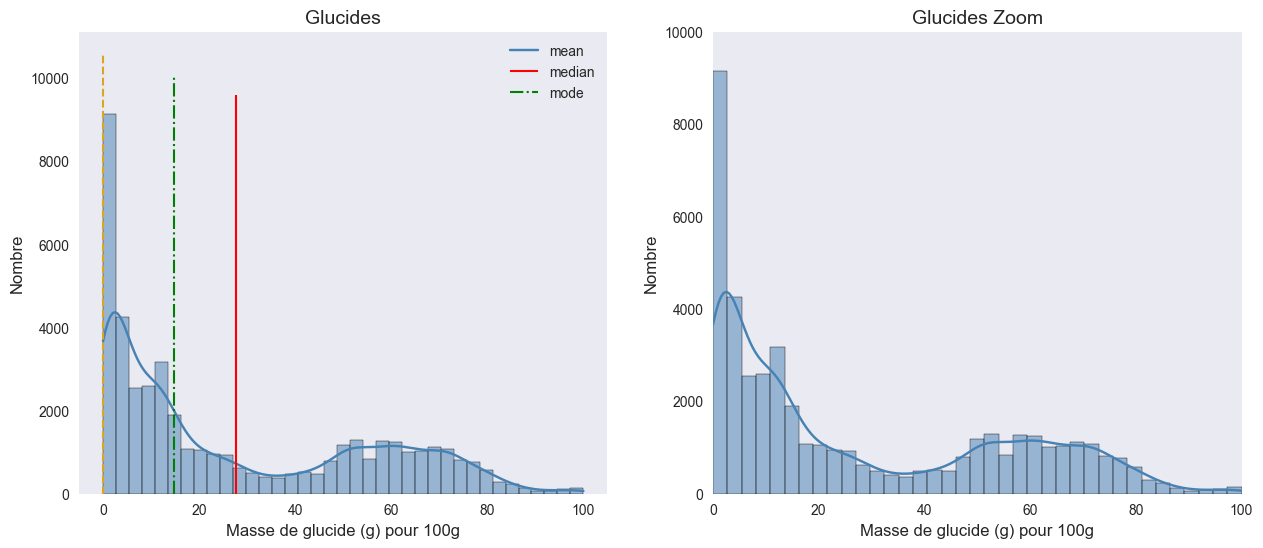

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


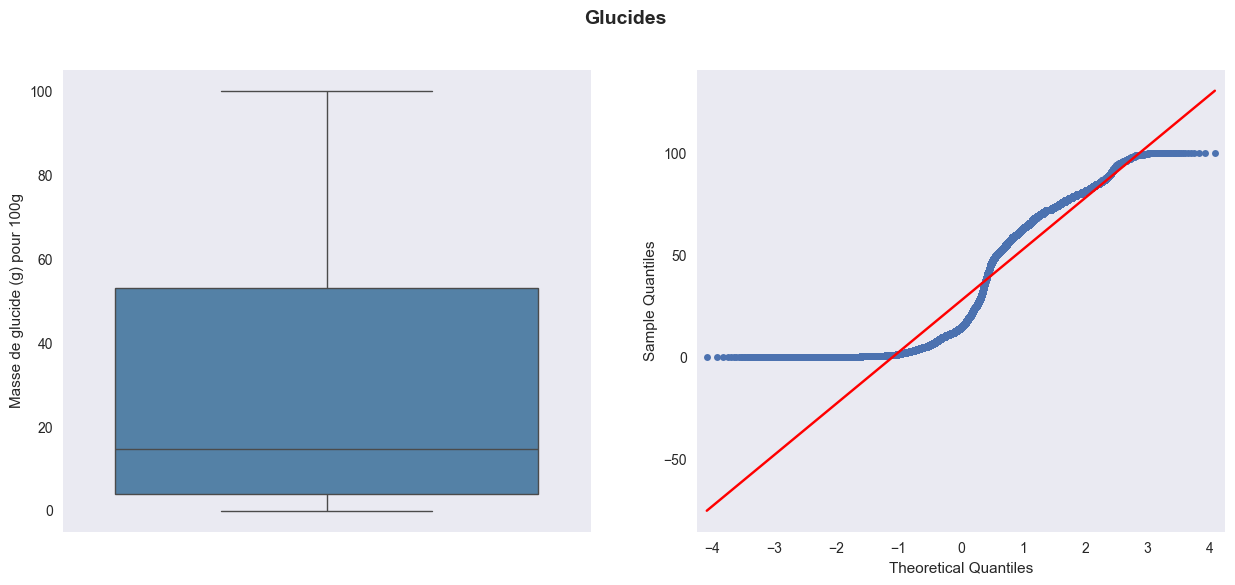

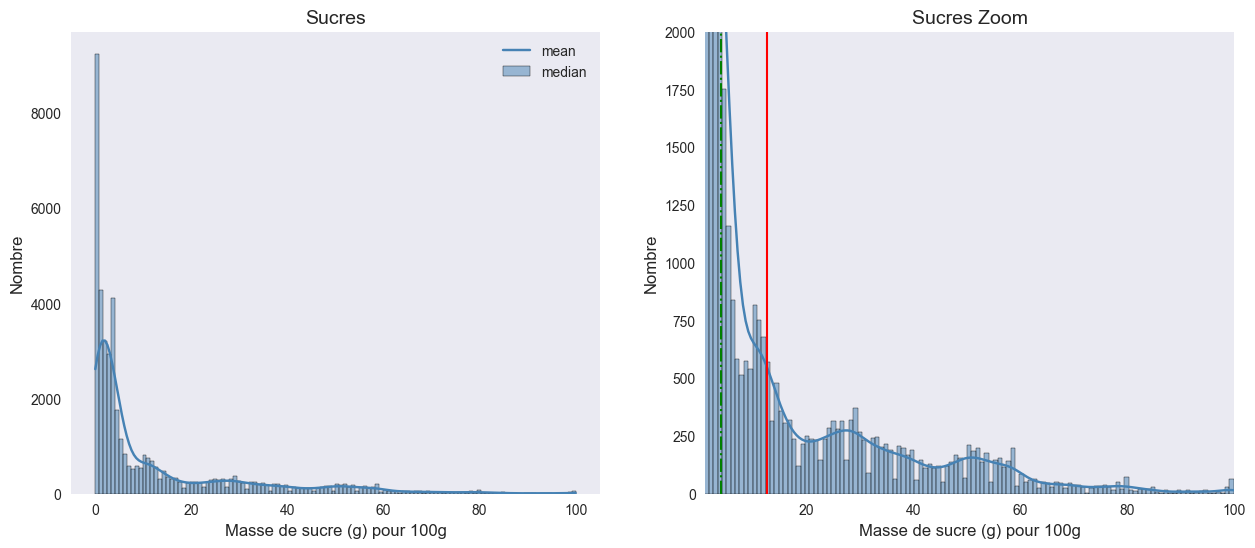

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


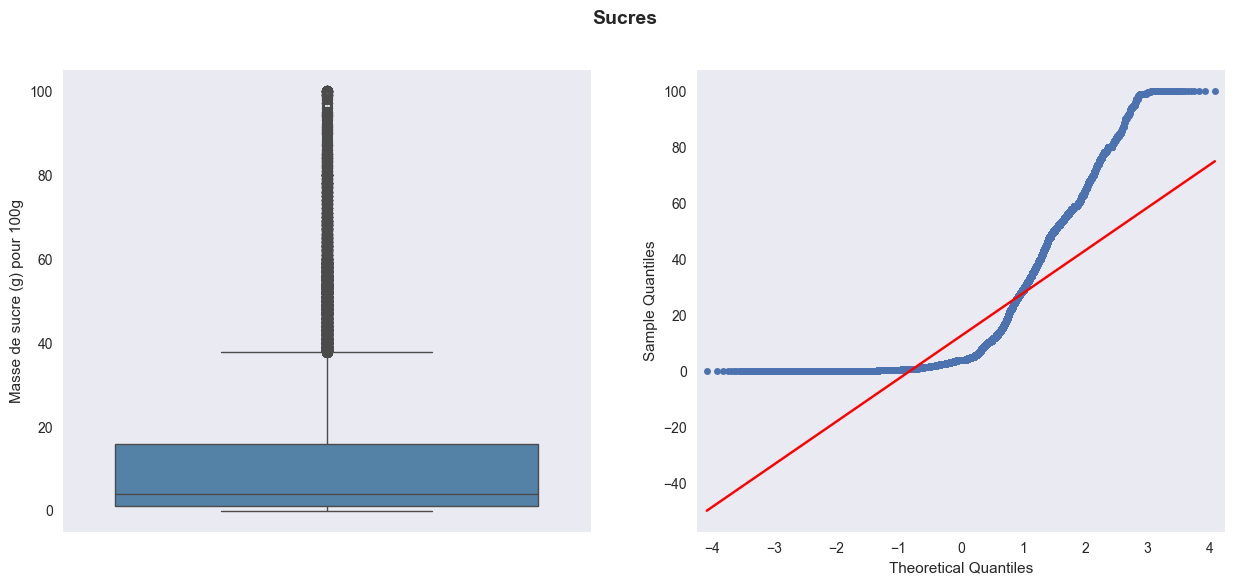

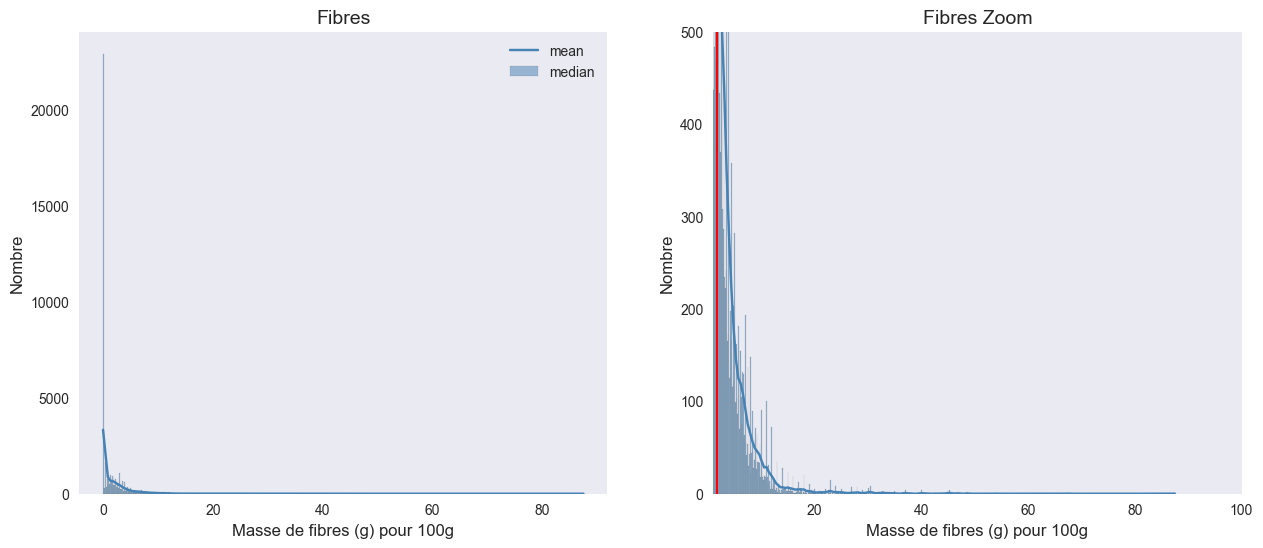

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


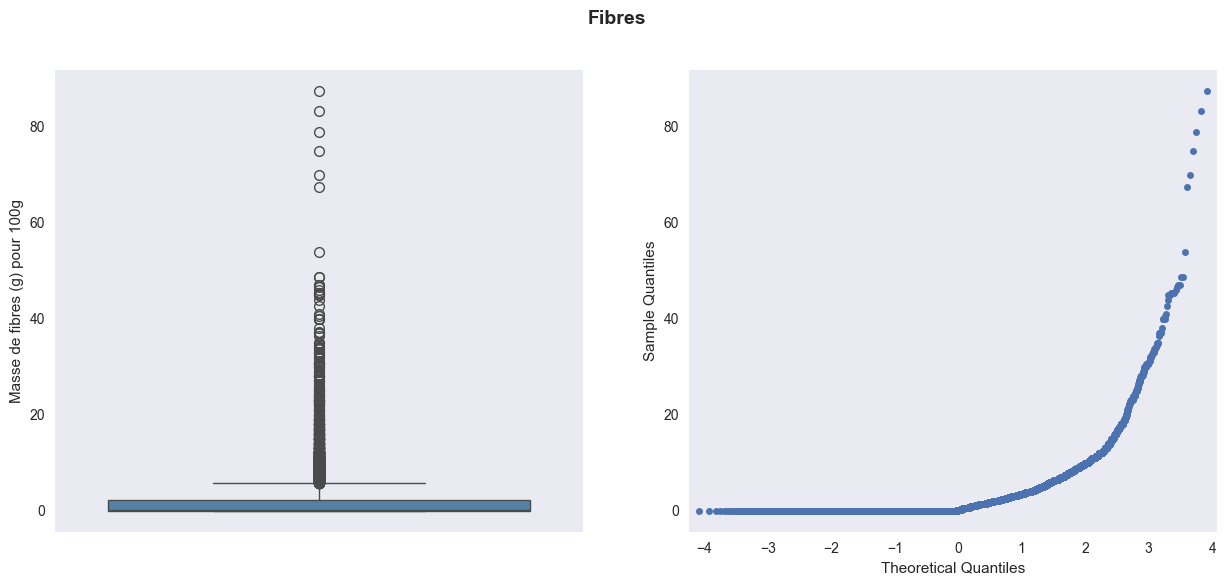

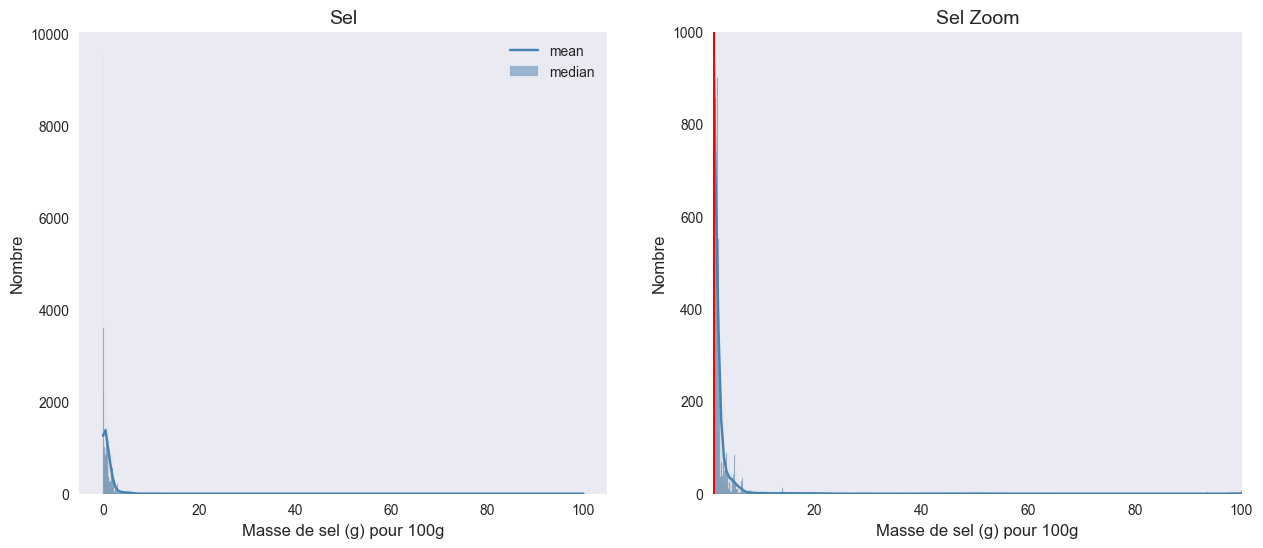

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


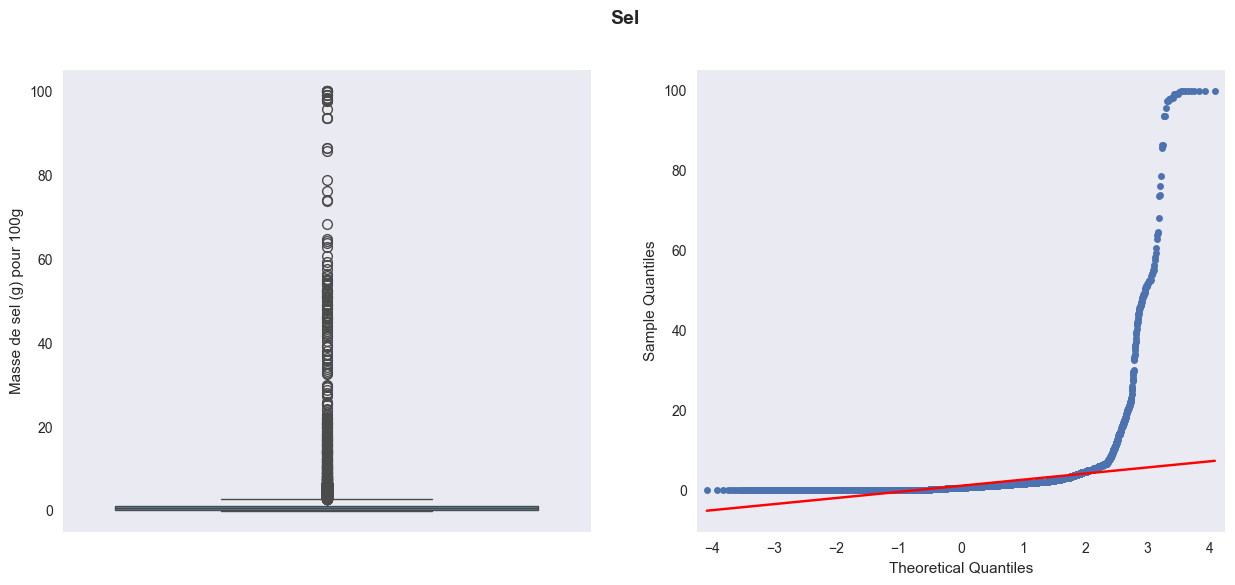

In [15]:
# Protéines
trace_histplot_gen_zoom(data, 'proteins_100g', 'Protéines', 'Masse de protéines (g) pour 100g', 1, 100, 0, 2500)
trace_dispersion_boxplot_qqplot(data, 'proteins_100g', 'Protéines', 'Masse de protéines (g) pour 100g')

# Lipides
trace_histplot_gen_zoom(data, 'fat_100g', 'Lipides', 'Masse de lipides (g) pour 100g', 1, 100, 0, 10000)
trace_dispersion_boxplot_qqplot(data, 'fat_100g', 'Lipides', 'Masse de lipides (g) pour 100g')

# Acides gras saturés
trace_histplot_gen_zoom(data, 'saturated_fat_100g', 'Acides gras saturés','Masse d\'acides gras saturés (g) pour 100g',1, 100, 0, 1000)
trace_dispersion_boxplot_qqplot(data, 'saturated_fat_100g','Acides gras saturés','Masse d\'acides gras saturés (g) pour 100g')

# Glucides
trace_histplot_gen_zoom(data, 'carbohydrates_100g', 'Glucides','Masse de glucide (g) pour 100g',0, 100, 0, 10000)
trace_dispersion_boxplot_qqplot(data, 'carbohydrates_100g', 'Glucides','Masse de glucide (g) pour 100g')

# Sucres
trace_histplot_gen_zoom(data, 'sugars_100g', 'Sucres','Masse de sucre (g) pour 100g',1, 100, 0, 2000, True, False, True)
trace_dispersion_boxplot_qqplot(data, 'sugars_100g', 'Sucres','Masse de sucre (g) pour 100g')

# Fibres
trace_histplot_gen_zoom(data, 'fiber_100g', 'Fibres','Masse de fibres (g) pour 100g',1, 100, 0, 500, True, False, True)
trace_dispersion_boxplot_qqplot(data, 'fiber_100g', 'Fibres','Masse de fibres (g) pour 100g')

# Sel
trace_histplot_gen_zoom(data, 'sel_100g', 'Sel','Masse de sel (g) pour 100g',1, 100, 0, 1000, True, False, True)
trace_dispersion_boxplot_qqplot(data, 'sel_100g', 'Sel','Masse de sel (g) pour 100g')

## Energie

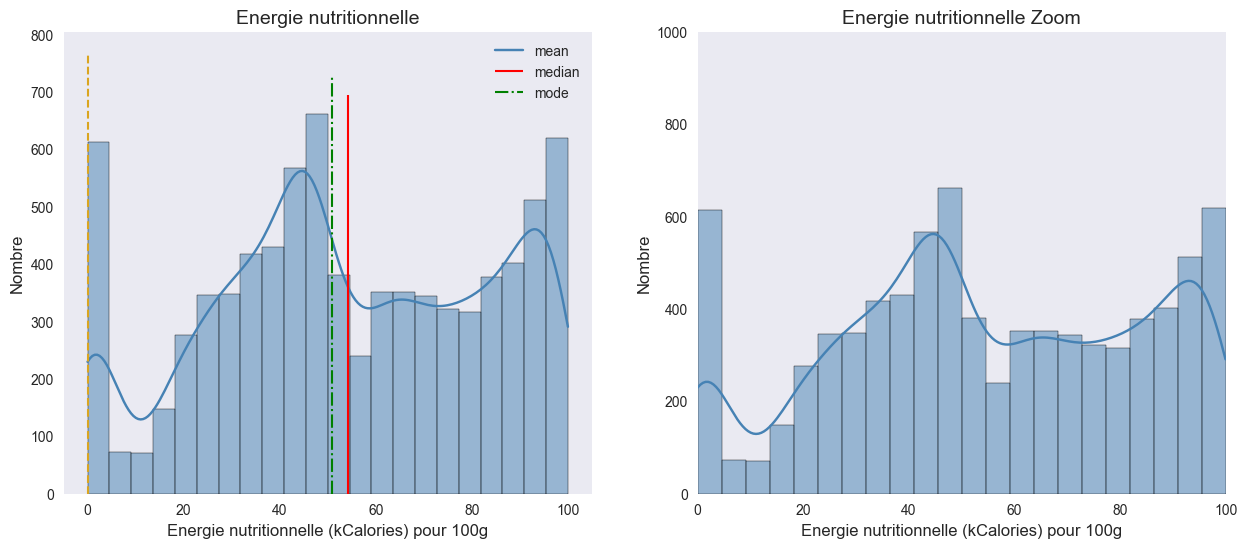

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


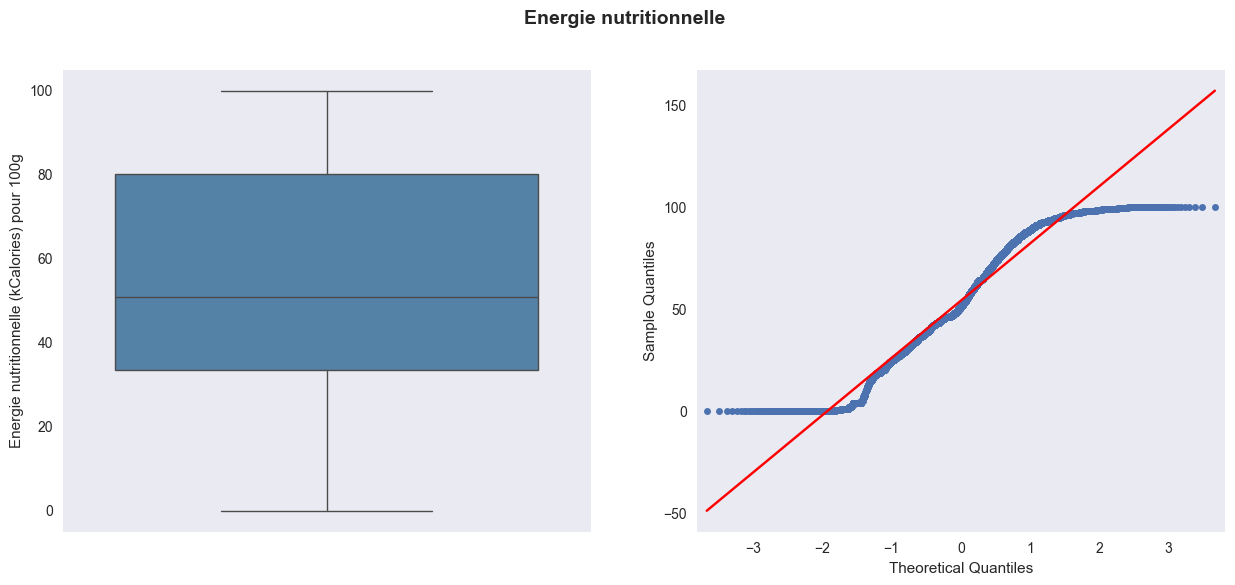

In [9]:
# Energie nutritionnelle
trace_histplot_gen_zoom(data, 'energy_100g', 'Energie nutritionnelle','Energie nutritionnelle (kCalories) pour 100g', 0, 100, 0, 1000, True, True)
trace_dispersion_boxplot_qqplot(data, 'energy_100g', 'Energie nutritionnelle','Energie nutritionnelle (kCalories) pour 100g')

In [16]:
def stat_descriptives(dataframe, liste_variables):
    """
    Statistiques descriptives moyenne, mediane, variance, écart-type,
    skewness et kurtosis du dataframe transmis en paramètre
    ----------
    @param IN : dataframe : DataFrame, obligatoire
                liste_variables : colonne dont on veut voir les stat descr
    @param OUT : dataframe des statistiques descriptives
    """
    liste_mean = ['mean']
    liste_median = ['median']
    liste_var = ['var']
    liste_std = ['std']
    liste_skew = ['skew']
    liste_kurtosis = ['kurtosis']
    liste_mode = ['mode']
    liste_cols = ['Desc']
    liste_max = ['Max']
    liste_min = ['Min']

    for col in liste_variables:
        liste_mean.append(dataframe[col].mean())
        liste_median.append(dataframe[col].median())
        liste_var.append(dataframe[col].var(ddof=0))
        liste_std.append(dataframe[col].std(ddof=0))
        liste_skew.append(dataframe[col].skew())
        liste_kurtosis.append(dataframe[col].kurtosis())
        liste_cols.append(col)
        liste_mode.append(dataframe[col].mode().to_string())
        liste_min.append(dataframe[col].min())
        liste_max.append(dataframe[col].max())

    data_stats = [liste_mean, liste_median, liste_var, liste_std, liste_skew,
                  liste_kurtosis, liste_mode, liste_min, liste_max]
    df_stat = pd.DataFrame(data_stats, columns=liste_cols)

    return df_stat.style.hide()

In [17]:
cols_quant_cont = ['fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'sel_100g']

In [18]:
# Statistiques descriptives
stat_descriptives(data, cols_quant_cont)

## Bilan :

'''
##### Toutes les courbes des variables quantitatives continues sont asymétriques, avec un skewness positif, indiquant une distribution étalée à droite.
##### Les courbes sont moins aplaties que la distribution normale donc les observations sont plus concentrées d'après les kurtosis empiriques positifs. Exception pour la courbe des glucides, avec un kurtosos empirique négatif donc une distribution plus aplatie que la distribution normale.
##### Un pic autour de 0 pour toutes les variables quantitatives ne peuvent pas être imputées à des valeurs erronées, puisque certains produits ne contiennent ni lipides, ni glucides, ni protéines, ni sel...
'''

## Variables Quantitatives Discrètes

### Nutrition score

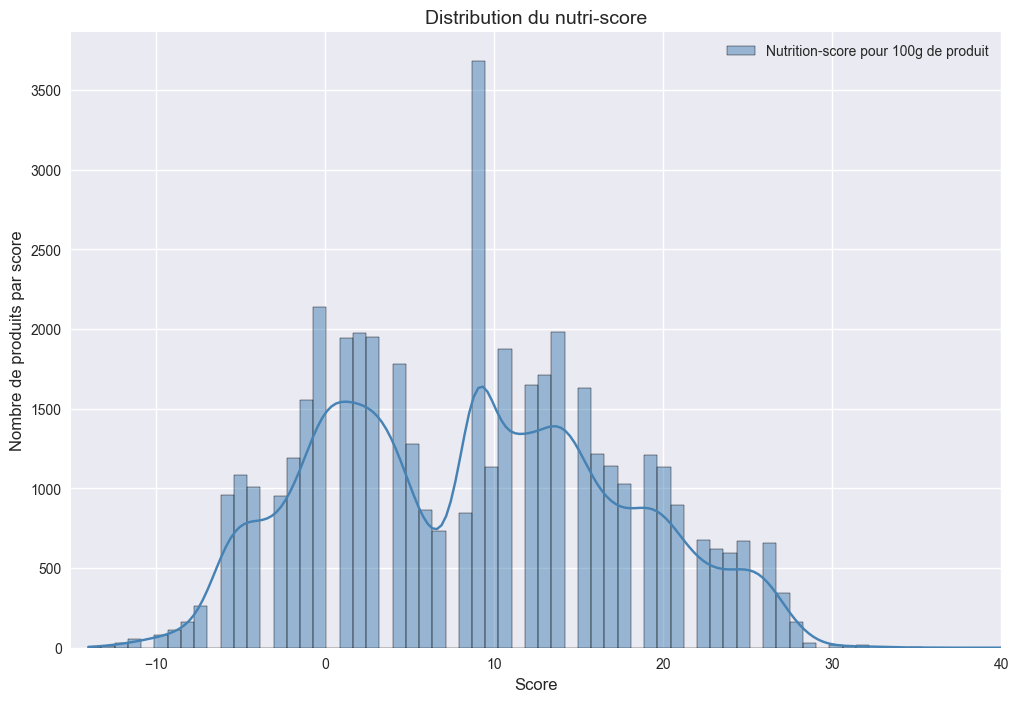

In [20]:
# Courbe de distribution du nutriscore
plt.figure(figsize=(12, 8))

sns.histplot(data['nutrition_score_fr_100g'], kde=True, color='SteelBlue', label='Nutrition-score pour 100g de produit')
plt.title("Distribution du nutri-score", fontsize=14)
plt.xlim(-15, 40)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Nombre de produits par score', fontsize=12)
plt.legend()
plt.show()

In [22]:
stat_descriptives(data, ['nutrition_score_fr_100g'])

## Repartition des produits par categories

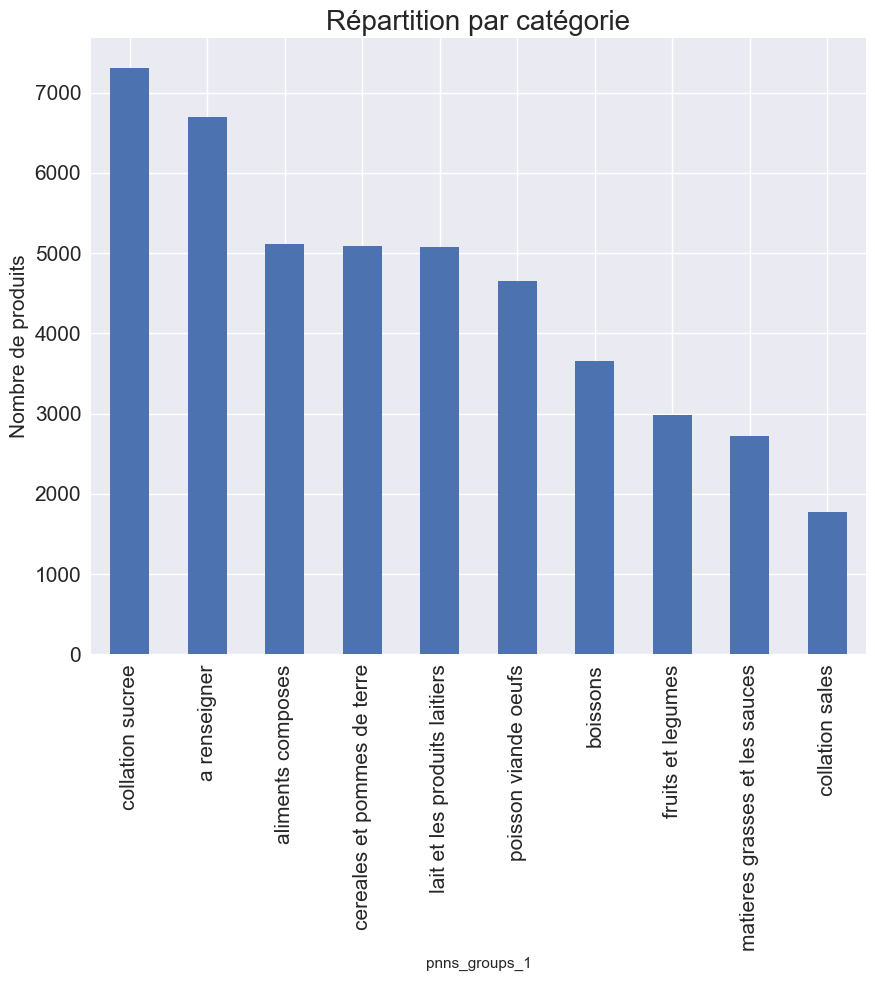

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

data['pnns_groups_1'].value_counts().plot(kind='bar')
ax.set_title('Répartition par catégorie', size=20)
ax.tick_params(labelsize=15)
ax.set_ylabel('Nombre de produits', size=15)
plt.show()

In [24]:
cat_a_renseigner = len(data[data['pnns_groups_1'] == 'a renseigner'])
cat_null = len(data[data['pnns_groups_1'].isnull()])
print(f"{(cat_a_renseigner + cat_null) / data.shape[0] * 100:.0f}% des produits sont sans catégories.")

15% des produits sont sans catégories.


## Nous constatons que 15% des produits sont sans categories renseignees

## Repartition des marques

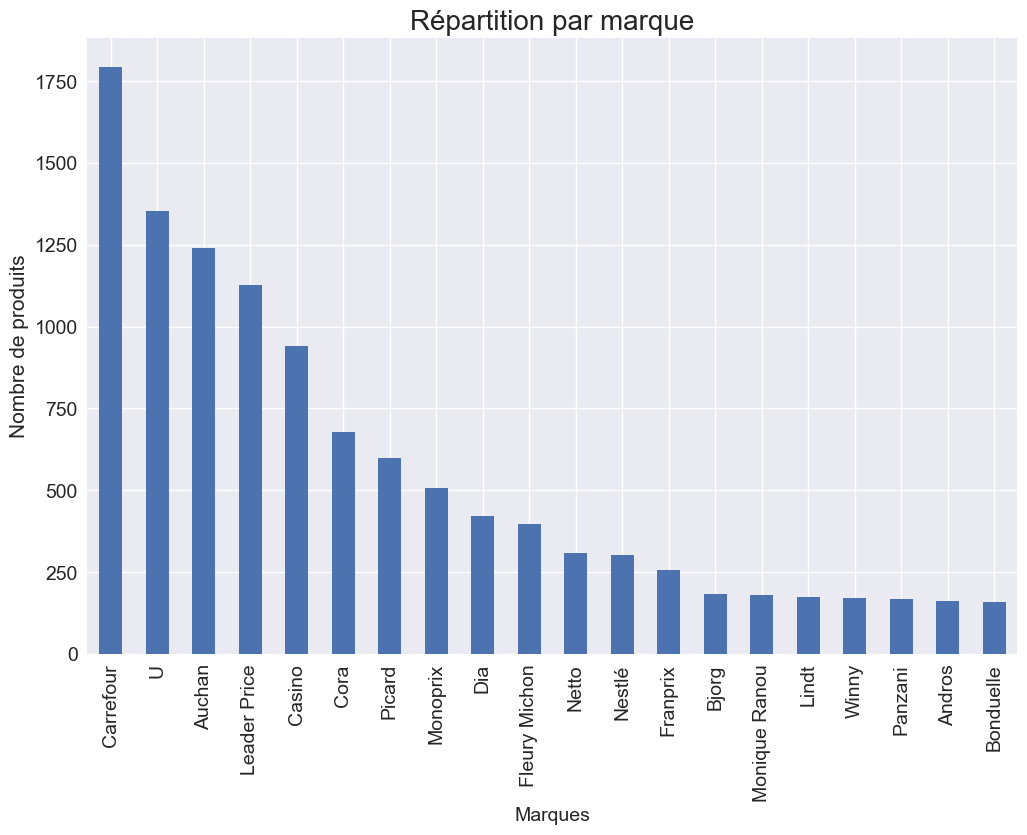

In [25]:
fig, ax = plt.subplots(figsize=(12, 8)
                      )
data['brands'].value_counts().head(20).plot(kind='bar')
ax.set_title("Répartition par marque", size=20)
ax.tick_params(labelsize=14)
ax.set_xlabel("Marques", size=14)
ax.set_ylabel('Nombre de produits', size=15)

plt.show()

#### On remarque que les grandes distributions sont dans le top mais on remarque egalement des marques de produit

## Repartition des notes des produits

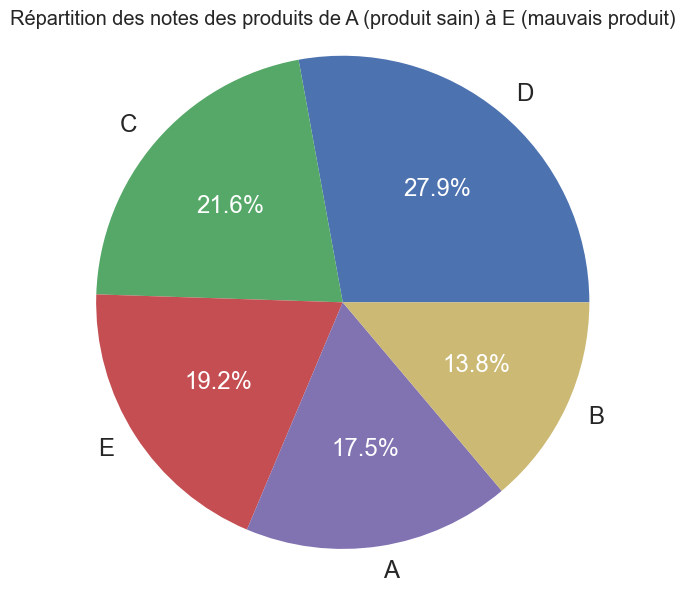

In [26]:
grades = data['nutrition_grade_fr'].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))

patches, texts, autotexts = ax.pie(grades.values, labels=grades.index, autopct='%1.1f%%')
for t in texts:
    t.set_text(t.get_text().upper())
    t.set_size('xx-large')
for t in autotexts: 
    t.set_size('xx-large')
    t.set_color('w')
ax.set_title('Répartition des notes des produits de A (produit sain) à E (mauvais produit)', size='x-large')
ax.axis('equal')

plt.show()

#### Bonnes repartitions de nos categories

## Rapport des valeurs energetiques

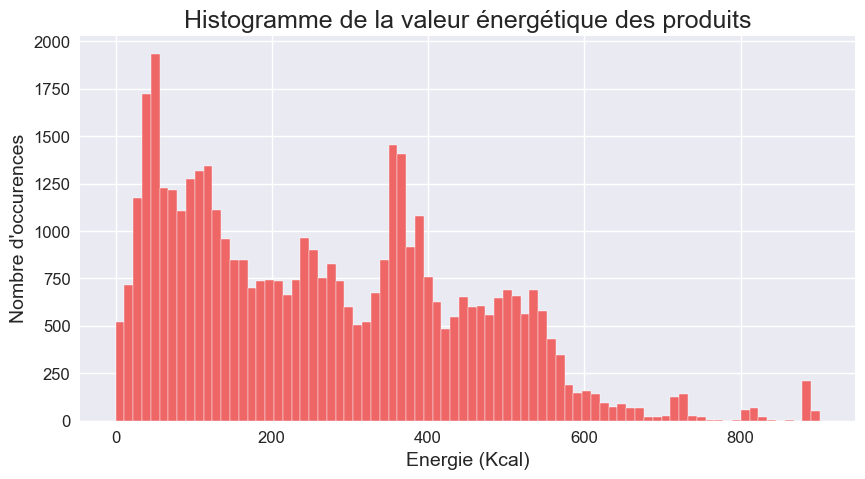

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(data['energy_100g'], bins=80, histtype='bar', color='#EE6666', edgecolor='white')
ax.set_title("Histogramme de la valeur énergétique des produits", size=18)
ax.set_xlabel("Energie (Kcal)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

#### La distribution semble etre legerement asymétrique avec une concentration plus importante des produits à faible valeur énergétique. 
#### Plusieurs pics notables. Cela pourrait indiquer des catégories distinctes de produits selon leur contenu énergétique.
#### Les valeurs énergétiques des produits varient largement, allant de presque 0 jusqu'à environ 900 kcal. Cela suggère une diversité significative dans le type de produits analysés.

## Top 10 des aproduits les plus calorifiques

In [28]:
data.nlargest(10, 'energy_100g')

code                                       product_name  \
32791  3596710219575                                      Huile de noix   
9606   3222470004426                                 Huile de tournesol   
12028  3245412459139              Raviolini au Jambon et Aux Œufs Frais   
43469  8437005613157              Huile d'olive extra vierge biologique   
439     411015621416                                 extra virgin cocos   
28414  3547130071496             Spécialité à base d'olive & de basilic   
28415  3547130071601            Spécialité à Base d'Olive et de Basilic   
28418  3547130079058      Huile d'olive vierge extra Castillo de Canena   
28419  3547130079331  Château Virant Famille Cheylan Aix-en-Provence...   
35478  3700663000252                                   Mélange 6 huiles   

                         brands nutrition_grade_fr  \
32791                    Auchan                  D   
9606                     Casino                NaN   
12028                 Carrefour                  D   
43469            La Organic Oro                NaN   
439                  Aman prana                  D   
28414             Oliviers & Co                  D   
28415            Oliviers & Co.                  E   
28418             Oliviers & Co                  D   
28419             Oliviers & Co                  D   
35478  Quintesens-bio,Biofuture                  C   

                        pnns_groups_1  energy_100g  fat_100g  \
32791  matieres grasses et les sauces   901.529637     100.0   
9606   matieres grasses et les sauces   901.051625     100.0   
12028     cereales et pommes de terre   901.051625       3.9   
43469  matieres grasses et les sauces   901.051625      93.3   
439    matieres grasses et les sauces   900.573614     100.0   
28414  matieres grasses et les sauces   900.573614      99.8   
28415  matieres grasses et les sauces   900.573614      99.8   
28418  matieres grasses et les sauces   900.573614      99.7   
28419  matieres grasses et les sauces   900.573614      99.8   
35478  matieres grasses et les sauces   900.573614     100.0   

       saturated_fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
32791                11.0                 0.0          0.0         0.0   
9606                 11.0                 0.0          0.0         0.0   
12028                 2.0                32.0          1.8         1.9   
43469                13.3                 0.0          4.0         0.0   
439                  92.1                 0.0          0.0         0.0   
28414                15.1                 0.0          0.0         0.0   
28415                15.1                 0.0          0.0         0.0   
28418                15.1                 0.0          0.0         0.0   
28419                15.1                 0.0          0.0         0.0   
35478                 8.9                 0.0          0.0         0.0   

       proteins_100g  nutrition_score_fr_100g  sel_100g  
32791            0.0                     11.0      0.00  
9606             0.0                      9.0      0.60  
12028           12.0                     12.0      0.84  
43469            0.0                      9.0      0.00  
439              0.0                     15.0      0.00  
28414            0.0                     11.0      0.00  
28415            0.0                     20.0      0.00  
28418            0.0                     11.0      0.00  
28419            0.0                     11.0      0.00  
35478            0.0                     10.0      0.00

## Top 10 des produits les moins calorifiques (superieur a ceux qui sont a 0)

In [21]:
data[data['energy_100g'] > 0].nsmallest(10, 'energy_100g')

product_name                brands nutrition_grade_fr  \
4547                     Free                    7UP                  B   
7029            Coca-Cola Zero             Coca-Cola                  B   
6436             CocaCola zero             Coca-Cola                  B   
415   Pétillante saveur Citron               Soguaro                  A   
1150       Sans sucres Agrumes  La Salvetat,Salvetat                  A   
1152             Badoit Citron         Badoit,Danone                  A   
1156          Badoit Framboise                Badoit                  A   
3566            Coca-cola zéro             Coca-Cola                  B   
4548     Pepsi light décaféiné                 Pepsi                  B   
5451             Limonade Zero                Auchan                  B   

     pnns_groups_1  energy_100g  fat_100g  saturated_fat_100g  \
4547      boissons     0.143403       0.0                 0.0   
7029      boissons     0.215105       0.0                 0.0   
6436      boissons     0.219885       0.0                 0.0   
415       boissons     0.239006       0.0                 0.0   
1150      boissons     0.239006       0.0                 0.0   
1152      boissons     0.239006       0.0                 0.0   
1156      boissons     0.239006       0.0                 0.0   
3566      boissons     0.239006       0.0                 0.0   
4548      boissons     0.239006       0.0                 0.0   
5451  a renseigner     0.239006       0.0                 0.0   

      carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  \
4547                 0.0          0.0         0.0            0.0   
7029                 0.0          0.0         0.0            0.0   
6436                 0.0          0.0         0.0            0.0   
415                  0.0          0.0         0.0            0.0   
1150                 0.0          0.0         0.0            0.0   
1152                 0.0          0.0         0.0            0.0   
1156                 0.0          0.0         0.0            0.0   
3566                 0.0          0.0         0.0            0.0   
4548                 0.0          0.0         0.0            0.0   
5451                 0.0          0.0         0.0            0.0   

      nutrition_score_fr_100g  temp  sel_100g  
4547                      1.0   0.0    0.0400  
7029                      1.0   0.0    0.0200  
6436                      1.0   0.0    0.0200  
415                       1.0   0.0    0.0070  
1150                      1.0   0.0    0.0100  
1152                      1.0   0.0    0.0450  
1156                      1.0   0.0    0.0450  
3566                      1.0   0.0    0.0254  
4548                      1.0   0.0    0.0100  
5451                      1.0   0.0    0.0100

#### Principalement des boissons

## Distribution des variables numeriques

In [37]:
numerical_cols = ['energy_100g', 'fat_100g', 'saturated_fat_100g', 
                  'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
                  'proteins_100g', 'nutrition_score_fr_100g', 'sel_100g']

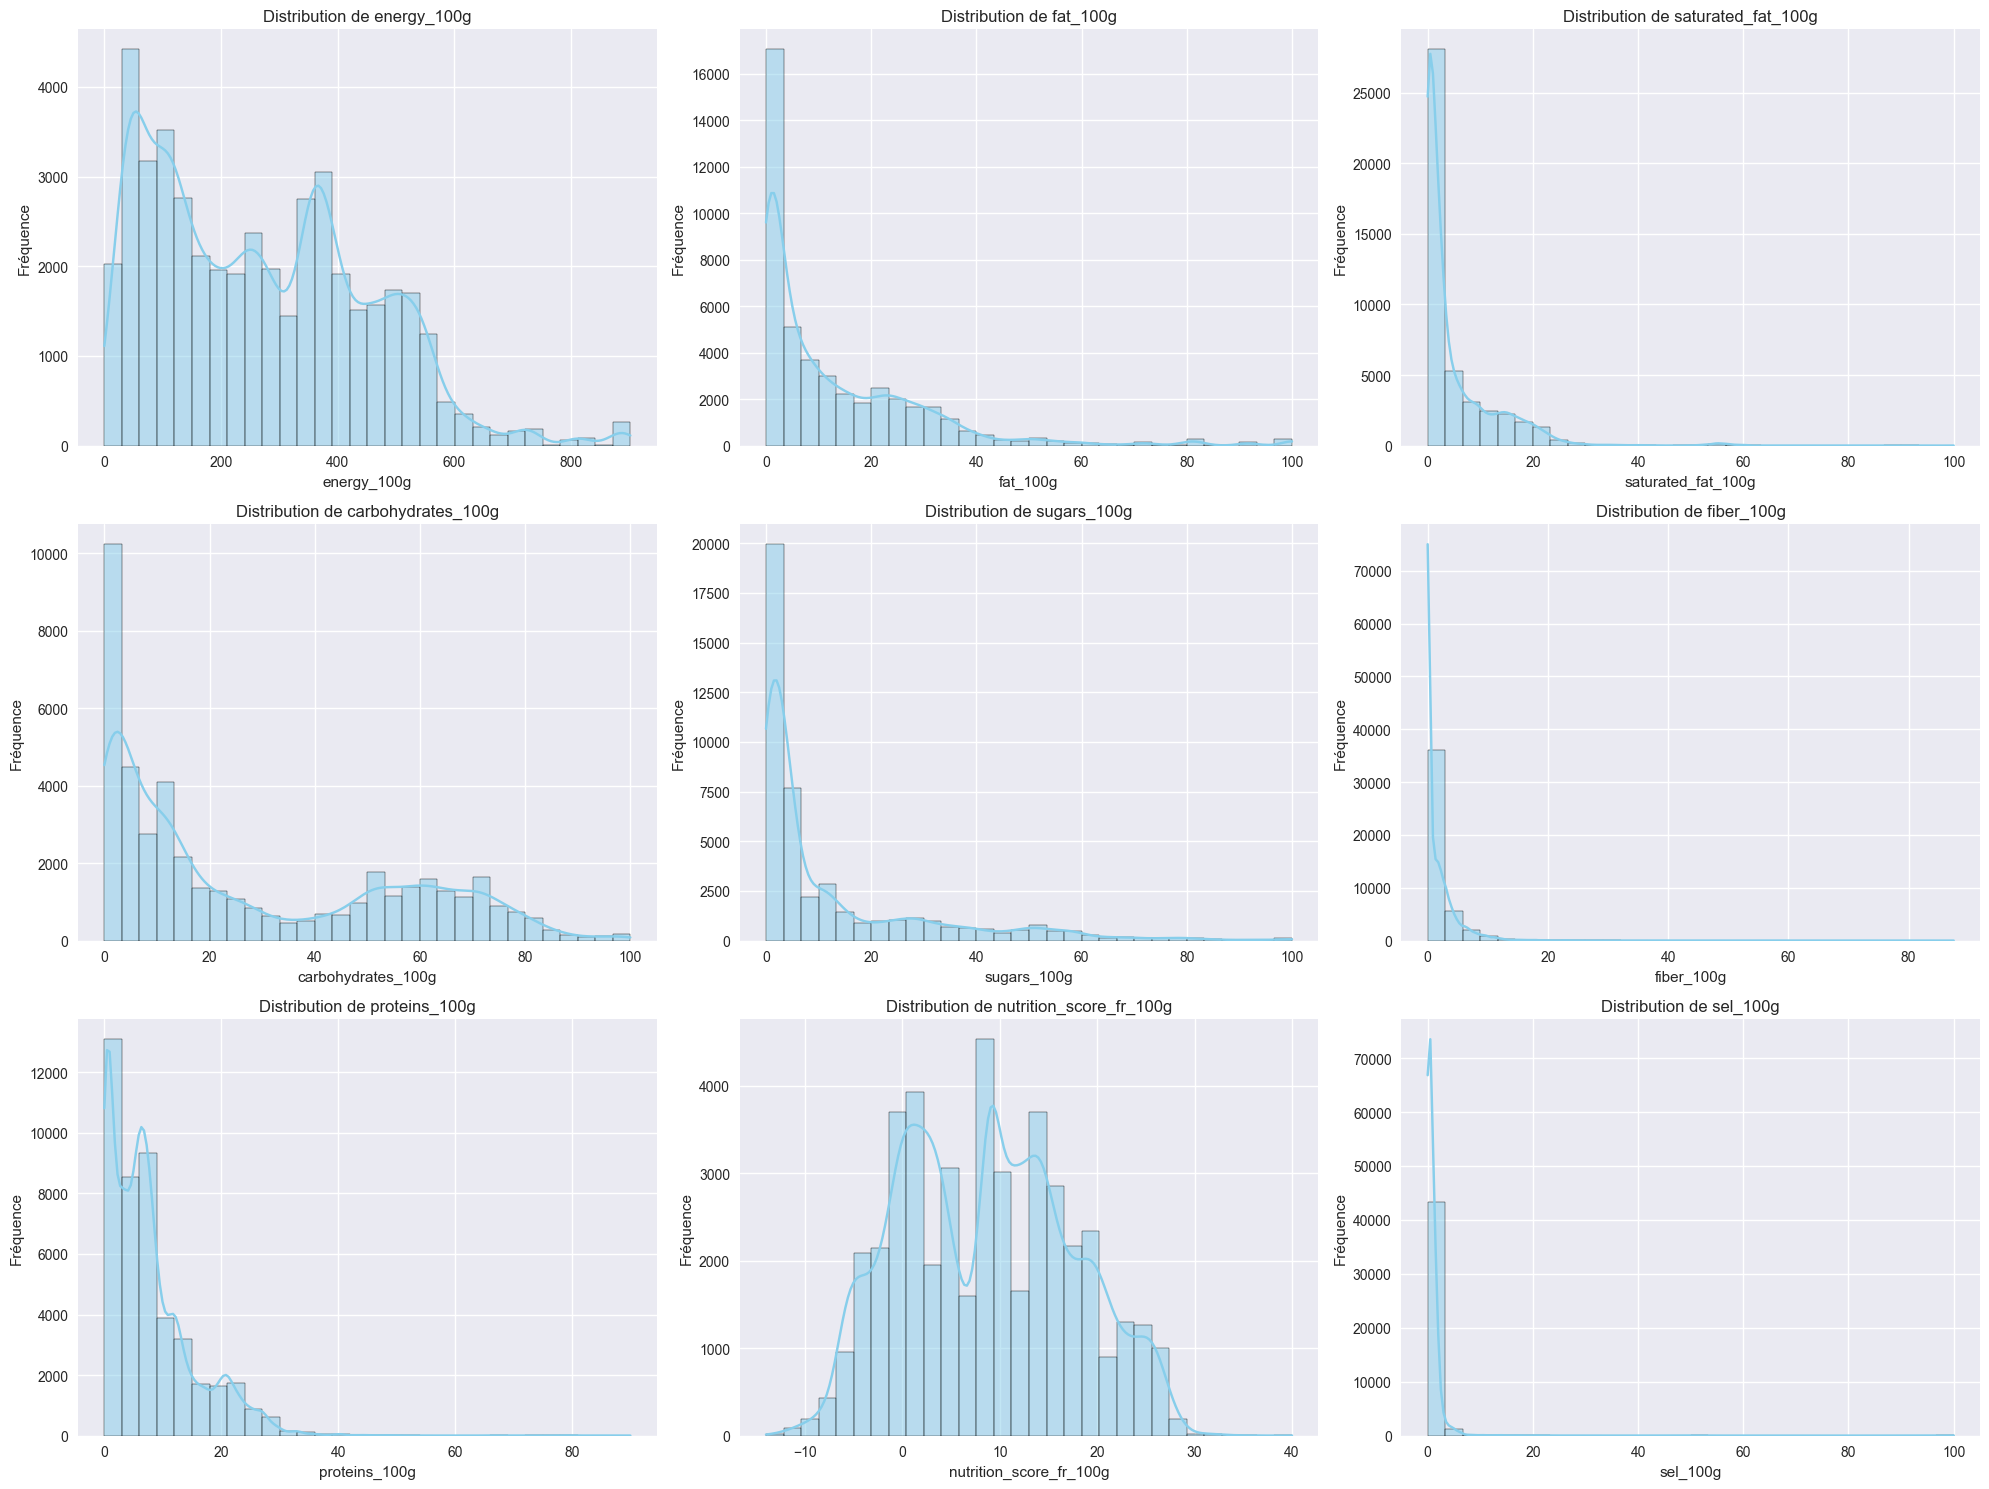

In [38]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

#### La majorité des produits contiennent peu de lipides. La distribution est très excentrée vers la gauche. Constat similaire sur les graisses saturees.
#### Pour les carbonhydrates la distribution est légèrement bi-modale. La majorité des produits contiennent peu de glucides. Concernant le sugars on retrouve une distribution similaire aux graisses saturees.
#### Pour les proteines nous avons une distribution excentrees vers la gauche encore une fois. La majorite des produits possedent moins de 10% de proteines.
#### Concernant les fibres, excentre vers la gauche, de 0 a 5g pour la pluspart des produits.
#### Concernant le sel, on retrouve une concentration vers la gauche elevee, proche de 0.

## Score Nutritionnel

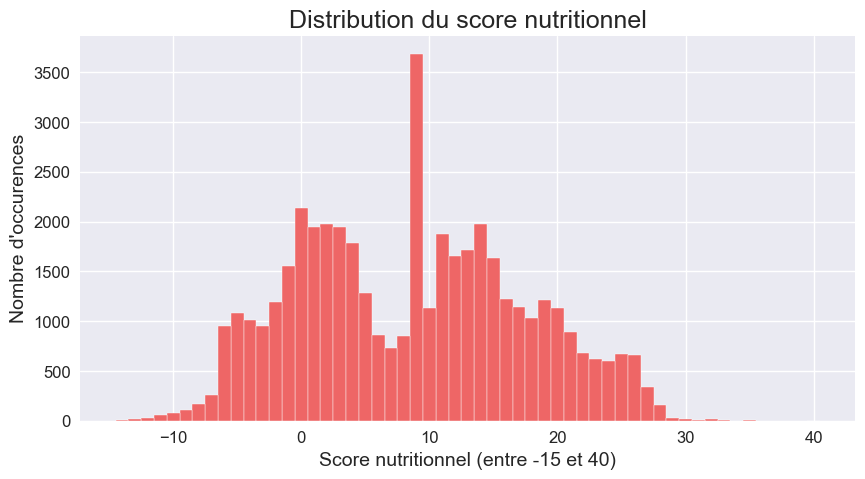

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x=data['nutrition_score_fr_100g'].value_counts().index, 
       height=data['nutrition_score_fr_100g'].value_counts(), 
       color='#EE6666', edgecolor='white', width=1)

ax.set_title("Distribution du score nutritionnel", size=18)
ax.set_xlabel("Score nutritionnel (entre -15 et 40)", size=14)
ax.set_ylabel("Nombre d'occurences", size=14)
ax.tick_params(labelsize=12)

plt.show()

##### La distribution semble approximativement normale, mais légèrement asymétrique vers la droite. La majorité des valeurs se concentrent entre 0 et 15, avec une décroissance progressive au-delà de cette plage.
##### Un pic marqué est visible autour de la valeur 10 est present et du a notre imputation.
##### Nous retrouvons egalement des scores avec des valeurs extremes (-15 a 40) expliquant la presence de produits sain/malsain.

## Passons a l'Analyse Bivariee

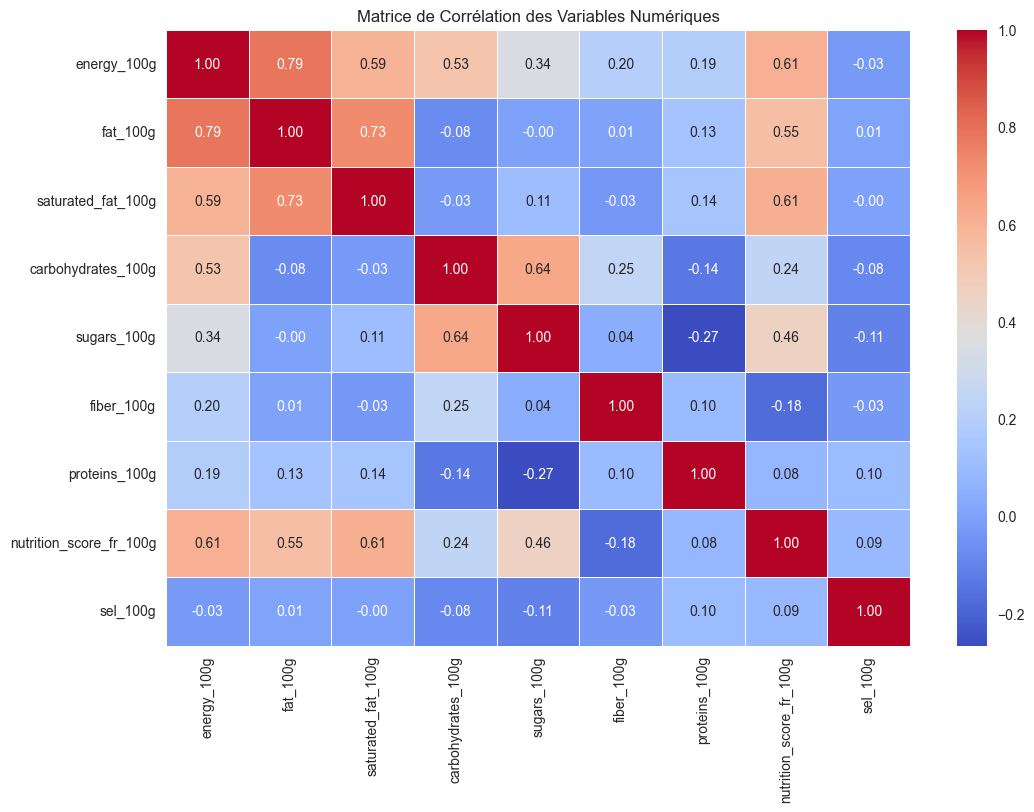

In [39]:
# Calculer la matrice de corrélation
correlation_matrix = data[numerical_cols].corr()

# Heatmap des corrélations pour visualiser les relations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

## Identifier les corrélations fortes et faibles

In [43]:
threshold_strong = 0.7  # Corrélation forte
threshold_weak = 0.3    # Corrélation faible

# Corrélations fortes (hors diagonal principale)
strong_corrs = correlation_matrix[(correlation_matrix.abs() >= threshold_strong) & (correlation_matrix < 1)].stack()
weak_corrs = correlation_matrix[(correlation_matrix.abs() <= threshold_weak) & (correlation_matrix.abs() > 0)].stack()

# Afficher les corrélations identifiées
strong_corrs_df = strong_corrs.reset_index(name='Correlation').rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2'})
weak_corrs_df = weak_corrs.reset_index(name='Correlation').rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2'})

In [44]:
strong_corrs_df

Variable 1          Variable 2  Correlation
0         energy_100g            fat_100g     0.786641
1            fat_100g         energy_100g     0.786641
2            fat_100g  saturated_fat_100g     0.726667
3  saturated_fat_100g            fat_100g     0.726667

In [45]:
weak_corrs_df

Variable 1               Variable 2  Correlation
0               energy_100g               fiber_100g     0.201901
1               energy_100g            proteins_100g     0.191525
2               energy_100g                 sel_100g    -0.026281
3                  fat_100g       carbohydrates_100g    -0.075345
4                  fat_100g              sugars_100g    -0.000361
5                  fat_100g               fiber_100g     0.005112
6                  fat_100g            proteins_100g     0.134821
7                  fat_100g                 sel_100g     0.009255
8        saturated_fat_100g       carbohydrates_100g    -0.025591
9        saturated_fat_100g              sugars_100g     0.109399
10       saturated_fat_100g               fiber_100g    -0.033802
11       saturated_fat_100g            proteins_100g     0.139971
12       saturated_fat_100g                 sel_100g    -0.002721
13       carbohydrates_100g                 fat_100g    -0.075345
14       carbohydrates_100g       saturated_fat_100g    -0.025591
15       carbohydrates_100g               fiber_100g     0.253038
16       carbohydrates_100g            proteins_100g    -0.135300
17       carbohydrates_100g  nutrition_score_fr_100g     0.240614
18       carbohydrates_100g                 sel_100g    -0.083829
19              sugars_100g                 fat_100g    -0.000361
20              sugars_100g       saturated_fat_100g     0.109399
21              sugars_100g               fiber_100g     0.043694
22              sugars_100g            proteins_100g    -0.266084
23              sugars_100g                 sel_100g    -0.106588
24               fiber_100g              energy_100g     0.201901
25               fiber_100g                 fat_100g     0.005112
26               fiber_100g       saturated_fat_100g    -0.033802
27               fiber_100g       carbohydrates_100g     0.253038
28               fiber_100g              sugars_100g     0.043694
29               fiber_100g            proteins_100g     0.099399
30               fiber_100g  nutrition_score_fr_100g    -0.176004
31               fiber_100g                 sel_100g    -0.030991
32            proteins_100g              energy_100g     0.191525
33            proteins_100g                 fat_100g     0.134821
34            proteins_100g       saturated_fat_100g     0.139971
35            proteins_100g       carbohydrates_100g    -0.135300
36            proteins_100g              sugars_100g    -0.266084
37            proteins_100g               fiber_100g     0.099399
38            proteins_100g  nutrition_score_fr_100g     0.081546
39            proteins_100g                 sel_100g     0.100099
40  nutrition_score_fr_100g       carbohydrates_100g     0.240614
41  nutrition_score_fr_100g               fiber_100g    -0.176004
42  nutrition_score_fr_100g            proteins_100g     0.081546
43  nutrition_score_fr_100g                 sel_100g     0.092041
44                 sel_100g              energy_100g    -0.026281
45                 sel_100g                 fat_100g     0.009255
46                 sel_100g       saturated_fat_100g    -0.002721
47                 sel_100g       carbohydrates_100g    -0.083829
48                 sel_100g              sugars_100g    -0.106588
49                 sel_100g               fiber_100g    -0.030991
50                 sel_100g            proteins_100g     0.100099
51                 sel_100g  nutrition_score_fr_100g     0.092041

## Correlation Forte
#### La corrélation entre energy_100g et fat_100g est forte et positive, ce qui signifie que les aliments ayant une teneur élevée en énergie tendent également à être riches en graisses. Cela peut être expliqué par le fait que les graisses sont une source importante de calories (9 kcal par gramme de graisse).

## Visualisation des relations bivariées (corrélations fortes)

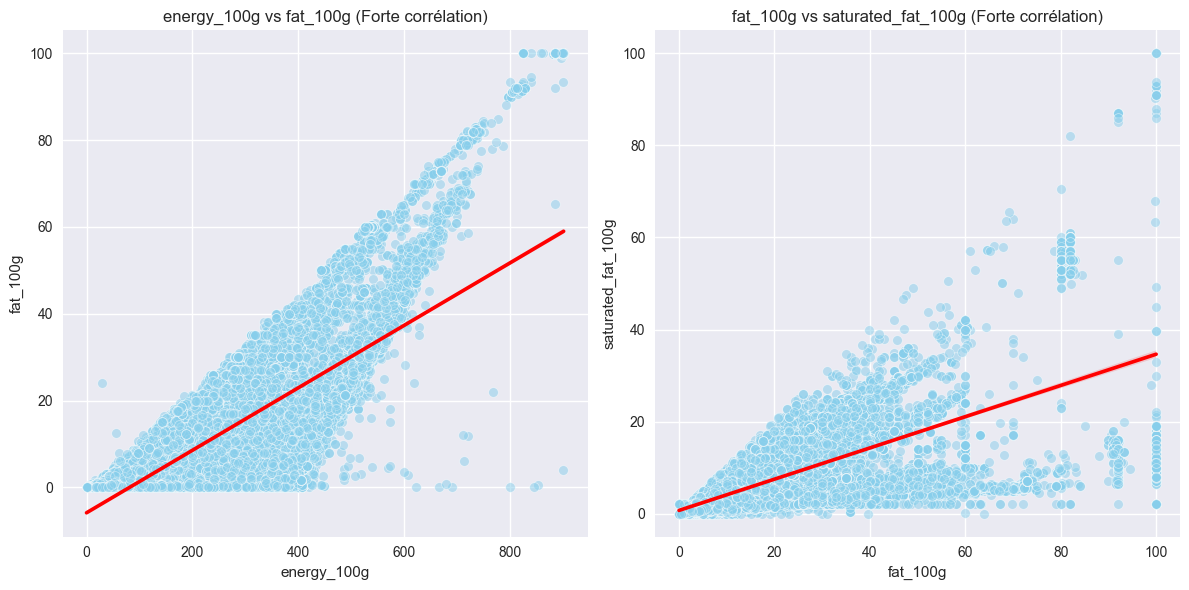

In [47]:
strong_pairs = [('energy_100g', 'fat_100g'), ('fat_100g', 'saturated_fat_100g')]

plt.figure(figsize=(12, 6))
for i, (x_var, y_var) in enumerate(strong_pairs, 1):
    plt.subplot(1, len(strong_pairs), i)
    sns.scatterplot(x=data[x_var], y=data[y_var], alpha=0.5, color="skyblue")
    sns.regplot(x=data[x_var], y=data[y_var], scatter=False, color="red")
    plt.title(f"{x_var} vs {y_var} (Forte corrélation)")
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()

## Engery VS Fat
## Tendance lineaire
#### Les points suivent une direction croissante bien alignée, ce qui confirme la forte corrélation (r = 0.79). Plus la teneur en graisses d'un produit est élevée, plus son apport énergétique augmente.
## Dispersion limitee
#### Bien que la tendance générale soit nette, il existe une certaine dispersion autour de la droite de régression, en particulier pour les valeurs d'énergie plus élevées. Cela peut indiquer que d'autres facteurs (par exemple, glucides ou protéines) contribuent également à l'énergie totale.

## Fat VS Saturated
### Une autre forte relation linéaire : la majorité des graisses saturées contribuent directement à la teneur totale en graisses.
### Cependant, il existe une dispersion légère, probablement due à des produits ayant une proportion variée de graisses saturées.

## Passons a une correlation faible energy_100g vs sel_100g

#### Cette corrélation est très faible (-0.03) et légèrement négative, ce qui signifie qu'il n'existe pratiquement aucune relation linéaire entre la teneur en énergie et la teneur en sel des produits. Cela peut s'expliquer par le fait que le sel n'apporte pas directement de calories, et donc sa présence est indépendante de l'énergie contenue dans un produit.

## Visualisation des relations bivariées (corrélations faibles)

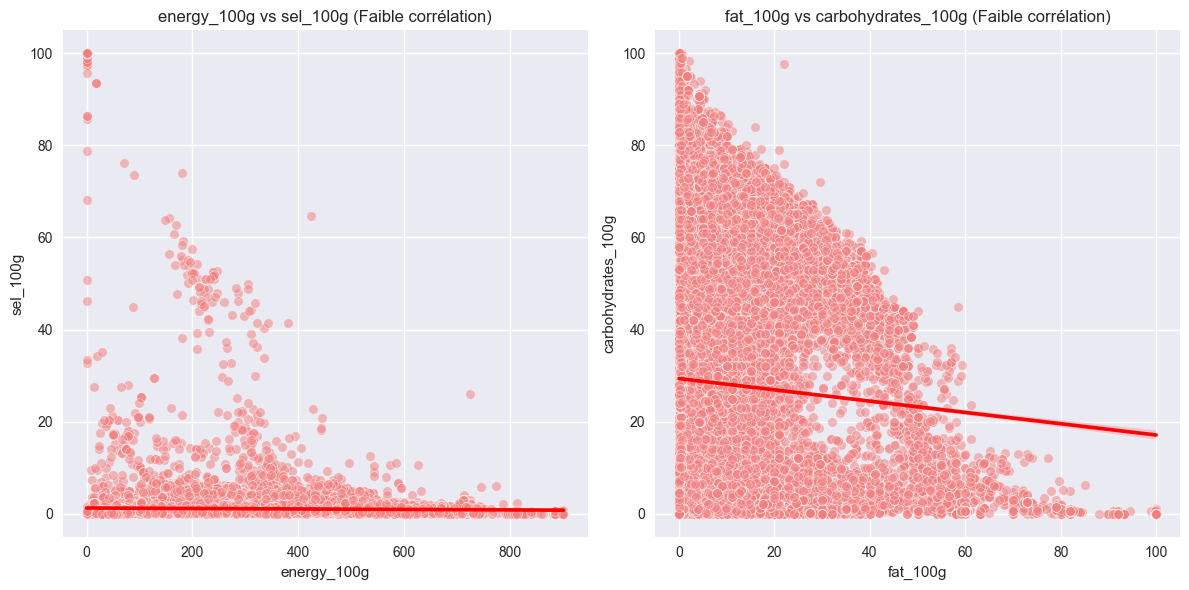

In [48]:
weak_pairs = [('energy_100g', 'sel_100g'), ('fat_100g', 'carbohydrates_100g')]

plt.figure(figsize=(12, 6))
for i, (x_var, y_var) in enumerate(weak_pairs, 1):
    plt.subplot(1, len(weak_pairs), i)
    sns.scatterplot(x=data[x_var], y=data[y_var], alpha=0.5, color="lightcoral")
    sns.regplot(x=data[x_var], y=data[y_var], scatter=False, color="red")
    plt.title(f"{x_var} vs {y_var} (Faible corrélation)")
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()

## Energy VS Sel

## Absence de tendance claire
#### Les points sont dispersés de manière aléatoire, sans schéma clair de relation entre l'énergie et la teneur en sel. Cela confirme la très faible corrélation calculée (𝑟=−0.026).
## Droite de régression plate
#### La droite rouge est quasiment horizontale, ce qui indique qu'un changement de la teneur en énergie n'entraîne pas de variation significative dans la teneur en sel.
## Valeurs extremes
#### Certains produits ont une teneur élevée en sel (> 60 g) et une faible teneur en énergie (< 200 kcal). Il pourrait s'agir de produits comme des condiments (par exemple, sauces ou bouillons).
#### D'autres produits, riches en énergie (700-800 kcal), présentent des niveaux très faibles de sel (< 5 g). Cela pourrait correspondre à des produits riches en matières grasses mais pauvres en sel, comme des huiles.

## Carbohydrate VS Fat

### Une légère tendance négative : les produits riches en graisses ont tendance à contenir moins de glucides.
### Cette relation faible est logique dans des produits comme les huiles (riches en graisses et sans glucides) ou les confiseries (riches en glucides mais pauvres en graisses).

## Commencons l'analyse Multi variees

### ACP

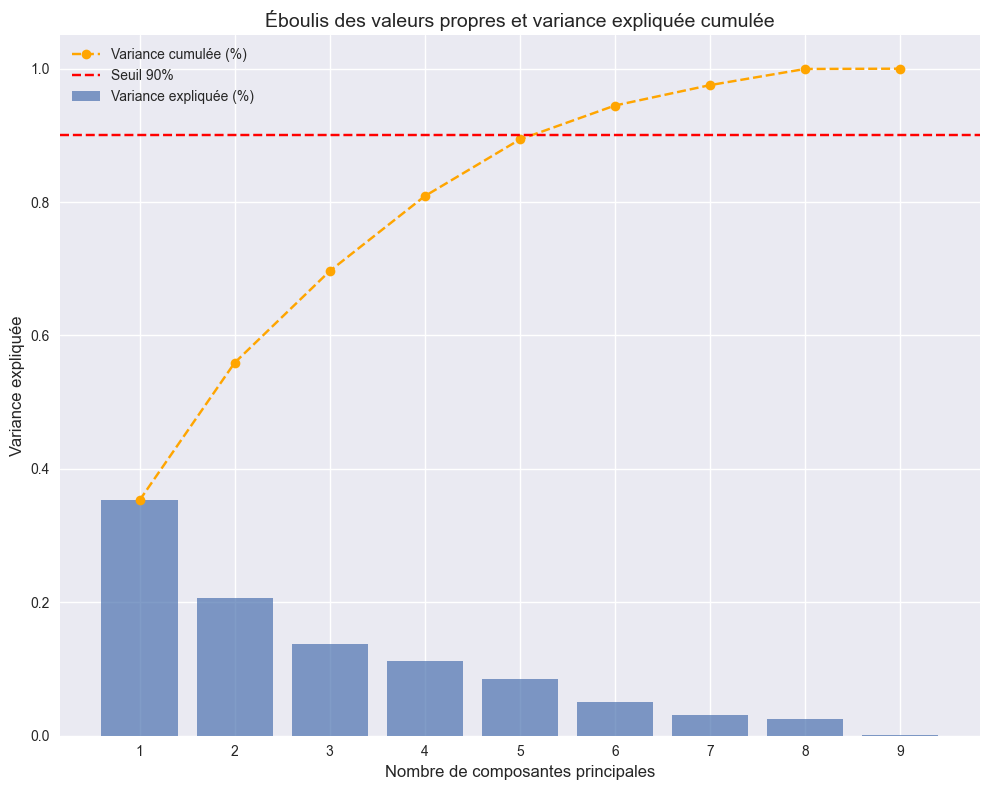

Nombre de composantes pour expliquer au moins 90% de la variance : 6


In [59]:
# Normalisation des données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data[numerical_cols].dropna())

# Application de l'ACP
pca = PCA()
pca_result = pca.fit_transform(data_normalized)

# Variance expliquée par composante
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Graphique combiné : Éboulis et variance cumulée
plt.figure(figsize=(10, 8))

# Éboulis des valeurs propres (barres)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Variance expliquée (%)')

# Variance expliquée cumulée (courbe)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange', label='Variance cumulée (%)')

# Ajout du seuil de 90%
plt.axhline(y=0.90, color='red', linestyle='--', label='Seuil 90%')

# Ajout des labels et de la légende
plt.title("Éboulis des valeurs propres et variance expliquée cumulée", fontsize=14)
plt.xlabel("Nombre de composantes principales", fontsize=12)
plt.ylabel("Variance expliquée", fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.grid(True)

# Affichage
plt.tight_layout()
plt.show()

# Nombre optimal de composantes pour expliquer au moins 90% de la variance
optimal_components = (cumulative_variance >= 0.90).argmax() + 1
print(f"Nombre de composantes pour expliquer au moins 90% de la variance : {optimal_components}")


### 90 % de la variance est donc expliquee par 6 composantes

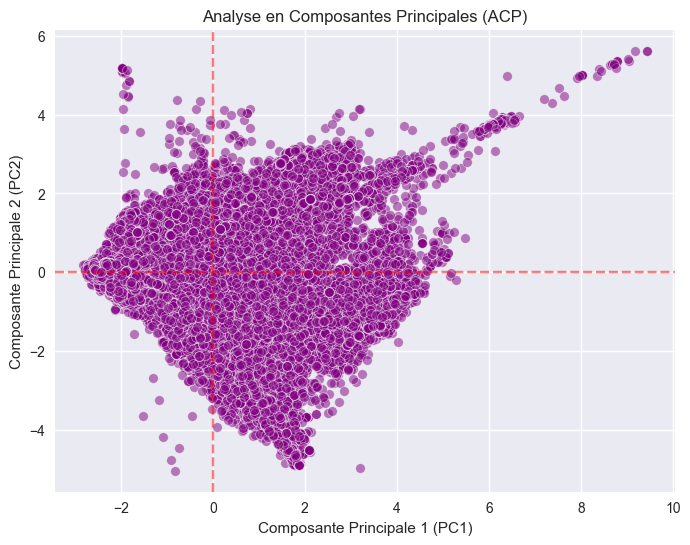

Variance expliquée par les composantes principales:
   Composante Principale  Variance Expliquée (%)
0                   PC1               35.277341
1                   PC2               20.622851


In [62]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols].dropna())

# PCA avec deux composantes principales
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Ajouter les résultats de la PCA dans un DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Visualisation de la PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], alpha=0.5, color="purple")
plt.title("Analyse en Composantes Principales (ACP)")
plt.xlabel("Composante Principale 1 (PC1)")
plt.ylabel("Composante Principale 2 (PC2)")
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.axvline(0, color='red', linestyle='--', alpha=0.5)
plt.grid(True)
plt.show()

# Variance expliquée par chaque composante principale
explained_variance = pd.DataFrame({
    'Composante Principale': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Variance Expliquée (%)': pca.explained_variance_ratio_ * 100
})

print("Variance expliquée par les composantes principales:\n", explained_variance)

### Cercle des correlations composantes principale 1 et 2

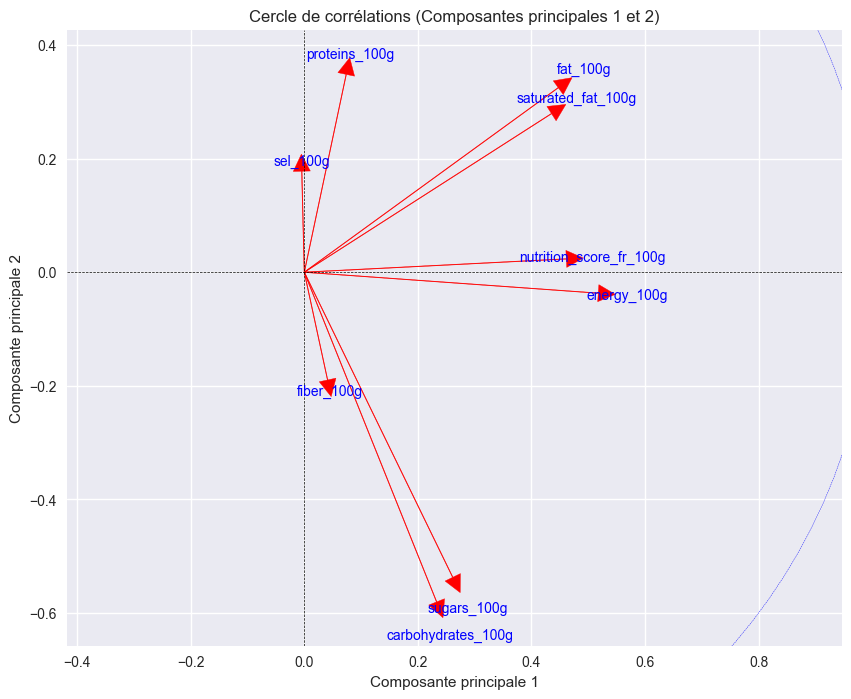

In [63]:
# Calcul des composantes principales et des contributions des variables
components = pca.components_[:2]  # Les deux premières composantes principales
variable_names = numerical_cols

# Cercle de corrélations
plt.figure(figsize=(10, 8))
for i, (x, y) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='r')
    plt.text(x * 1.1, y * 1.1, variable_names[i], color='b', ha='center', va='center')

# Ajout des éléments graphiques
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(plt.circle)
plt.title("Cercle de corrélations (Composantes principales 1 et 2)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.axis('equal')
plt.show()

## ANOVA - Nutrition grade

##### Nous vérifierons ici s'il y a une variance égale entre les groupes de caractéristiques catégorielles 'nutrition_grade_fr' et la réponse continue 'proteins_100g'. S'il y a une variance égale entre les groupes, cela signifie que cette caractéristique n'a pas d'impact sur la réponse et qu'elle ne peut pas être prise en compte pour la formation du modèle.

##### H0 - hypothèse nulle : les moyennes des protéines par nutrition_grade_fr sont égales μA=μB=μC=μD=μE.
##### H1 - hypothèse alternative : au moins un des groupes de protéines par nutrition_grade_fr à une moyenne différente des autres groupes μA!=μB!=μC!=μD!=μE.

### Condition a verifier :
##### 1 - Les échantillons sont indépendants les uns des autres.
##### 2 - Les données sont normalement distribuées.
##### 3 - Les écarts-types de population des groupes sont homoscédastiques.

In [66]:
def test_normalite(data):
    """
    Test de la normalité d'une distribution
    Parameters
    ----------
    data : dataframe ou dataframe restreint (une seule variable) obligatoire
    Returns
    -------
    None.
    """
    #  H0 : la distribution des données est normale (P>0,05)
    #  H1 : la distribution des données n'est pas normale (P<0,05)

    df_resultat = pd.DataFrame([])
    # Shapiro-Wilk - D'Agostino's K^2
    for f_name, func in zip(['Shapiro-Wilks', "D'Agostino K^2"], [shapiro, normaltest]):
        stat, p_val = func(data)
        df_resultat.loc[f_name, 'stat'] = stat
        df_resultat.loc[f_name, 'p_value'] = p_val
        df_resultat.loc[f_name, 'res'] = [p_val > 0.05]
        bool = df_resultat.loc[f_name, 'res']

        if bool == True:
            df_resultat.loc[f_name, 'bilan'] = 'H0 aceptée - distribution normale'
        else:
            df_resultat.loc[f_name, 'bilan'] = 'H0 rejetée - distribution non normale'

    # Anderson-Darling
    result = anderson(data, dist='norm')
    df_resultat.loc['Anderson-Darling', 'stat'] = result.statistic
    res_and = [(int(result.significance_level[i]), result.statistic < res)
               for i, res in enumerate(result.critical_values)]
    df_resultat.loc['Anderson-Darling', 'res'] = str(res_and)
    display(df_resultat)

## Faisons quelques tests de normalites

In [67]:
test_normalite(data['proteins_100g'])

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks      NaN      1.0   
D'Agostino K^2     NaN      NaN   
Anderson-Darling   NaN      NaN   

                                                                res  \
Shapiro-Wilks                                                  True   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks         H0 aceptée - distribution normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

##### Conclusion : On rejette l'hypothèse H0 : la courbe de distribution des protéines n'est pas normale surtout pour les données de tête et de queue.

##### Préparation des variables de travail pour les tests

In [68]:
gb = data.groupby('nutrition_grade_fr')['proteins_100g']
nutrigr_df = pd.DataFrame([gb.get_group(n).values for n in list('ABCDE')],
                          index=list('ABCDE')).T
nutrigr_df_sans_nan = nutrigr_df.dropna()
nutrigr_df_a = nutrigr_df_sans_nan['A']
nutrigr_df_b = nutrigr_df_sans_nan['B']
nutrigr_df_c = nutrigr_df_sans_nan['C']
nutrigr_df_d = nutrigr_df_sans_nan['D']
nutrigr_df_e = nutrigr_df_sans_nan['E']

In [69]:
for col in nutrigr_df_sans_nan.columns:
    test_normalite(nutrigr_df_sans_nan[col])

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.878336      0.0   
D'Agostino K^2    2114.938204      0.0   
Anderson-Darling   133.863301      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.807235      0.0   
D'Agostino K^2    3500.494153      0.0   
Anderson-Darling   259.099490      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat        p_value  \
Shapiro-Wilks       0.865079   0.000000e+00   
D'Agostino K^2    975.785433  1.290878e-212   
Anderson-Darling  258.723687            NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat        p_value  \
Shapiro-Wilks       0.910462   0.000000e+00   
D'Agostino K^2    596.485181  2.984617e-130   
Anderson-Darling  165.912375            NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


stat  p_value  \
Shapiro-Wilks        0.842782      0.0   
D'Agostino K^2    1700.441072      0.0   
Anderson-Darling   270.568733      NaN   

                                                                res  \
Shapiro-Wilks                                                 False   
D'Agostino K^2                                              [False]   
Anderson-Darling  [(15, False), (10, False), (5, False), (2, Fal...   

                                                  bilan  
Shapiro-Wilks     H0 rejetée - distribution non normale  
D'Agostino K^2    H0 rejetée - distribution non normale  
Anderson-Darling                                    NaN

##### Conclusion : aucune distribution des groupes de protéines par nutrition_grade_fr est normale.

### Verification homoscedasticite

In [70]:
# Préparation des variables
gb = data.groupby('nutrition_grade_fr')['proteins_100g']
nutrigr_df = pd.DataFrame([gb.get_group(n).values for n in list('ABCDE')],
                          index=list('ABCDE')).T
nutrigr_df_sans_nan = nutrigr_df.dropna()
nutrigr_df_a = nutrigr_df_sans_nan['A']
nutrigr_df_b = nutrigr_df_sans_nan['B']
nutrigr_df_c = nutrigr_df_sans_nan['C']
nutrigr_df_d = nutrigr_df_sans_nan['D']
nutrigr_df_e = nutrigr_df_sans_nan['E']

In [71]:
#  Test de Bartlett's
# H0 : les groupes sont homoscédastiques,variances identiques
# p_value>0.05 rejet de H1 en faveur de H0
# p_value<=0.05 H0 rejetée en faveur de H1
# H1 : les groupes sont hétéroscédastiques variances différentes

F_val, p_value = stats.bartlett(nutrigr_df_a, nutrigr_df_b, nutrigr_df_b, nutrigr_df_d, nutrigr_df_e)
print(f'Test Bartlett - resultats: F={F_val}, P_value ={p_value}\n')
print('Groupes probablement homoscédastiques') if p_value > 0.05 else print('Groupes probablement hétéroscédastiques')

Test Bartlett - resultats: F=614.395376158724, P_value =1.1873222058775536e-131

Groupes probablement hétéroscédastiques


##### Conclusion : p_value<0.05 on rejette H0 au profit de H1, les groupes sont hétéroscédastiques. Tout au moins on ne peut pas dire que les variances sont significativement identiques.

In [72]:
# Identification des groupes basés sur `nutrition_grade_fr`
categorical_column = "nutrition_grade_fr"

# Liste des variables numériques à tester
anova_results = {}
for col in numerical_cols:
    # Création de groupes selon les catégories
    groups = [data[data[categorical_column] == category][col].dropna()
              for category in data[categorical_column].unique() if category is not None]
    
    # Test ANOVA
    if len(groups) > 1:  # S'assurer qu'il y a plusieurs groupes
        anova = f_oneway(*groups)
        anova_results[col] = anova.pvalue

# Résultats triés par significativité (p-value)
anova_results_sorted = {k: v for k, v in sorted(anova_results.items(), key=lambda item: item[1])}
anova_results_sorted

c:\Users\cosic\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


{'energy_100g': nan,
 'fat_100g': nan,
 'saturated_fat_100g': nan,
 'carbohydrates_100g': nan,
 'sugars_100g': nan,
 'fiber_100g': nan,
 'proteins_100g': nan,
 'nutrition_score_fr_100g': nan,
 'sel_100g': nan}

### Distributions des variables numériques / categorielles significatives

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


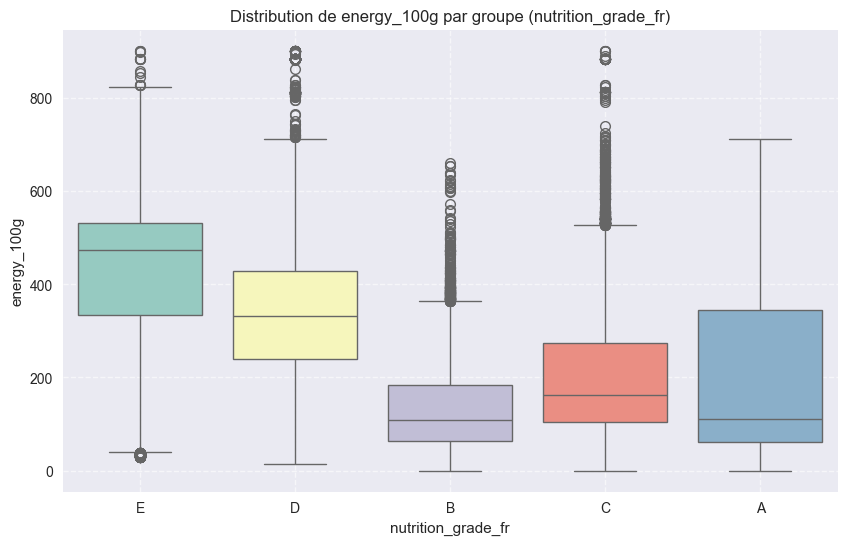

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


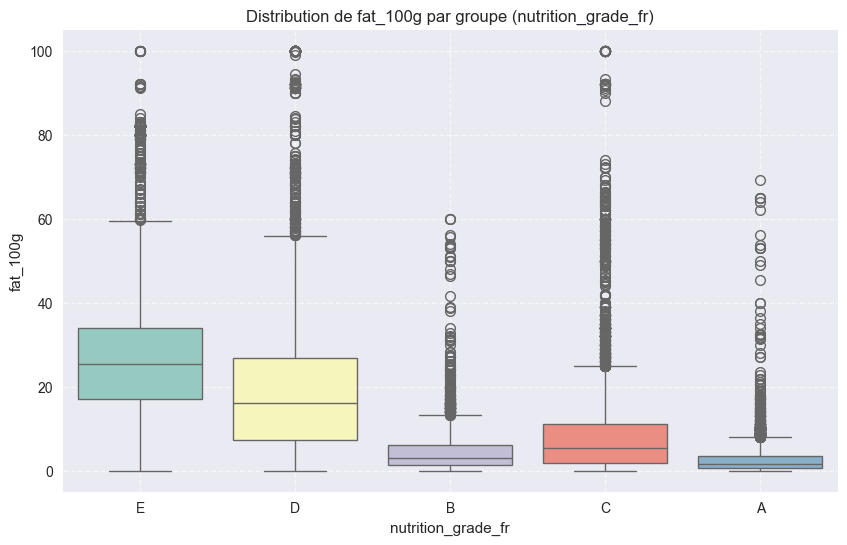

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


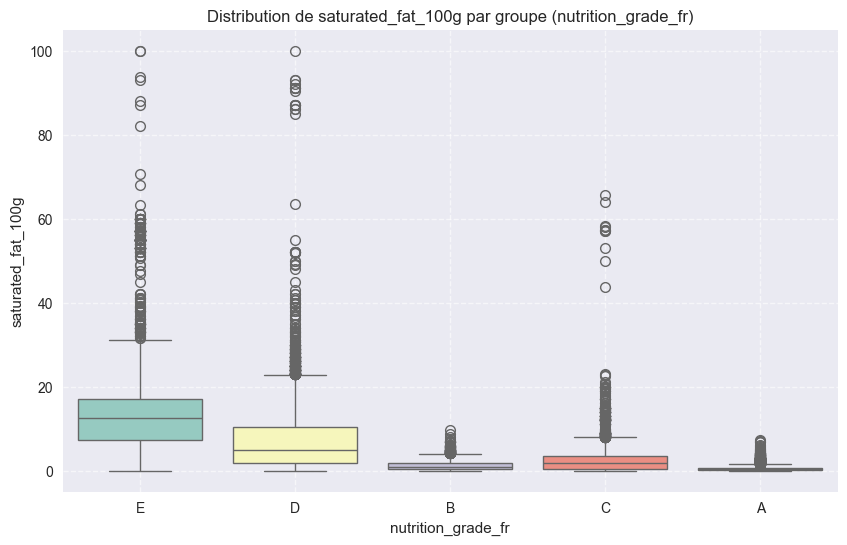

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


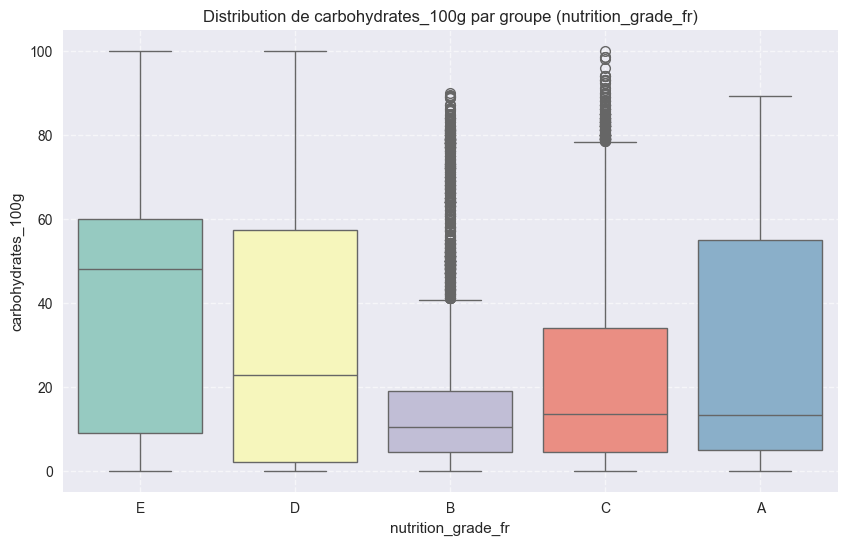

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


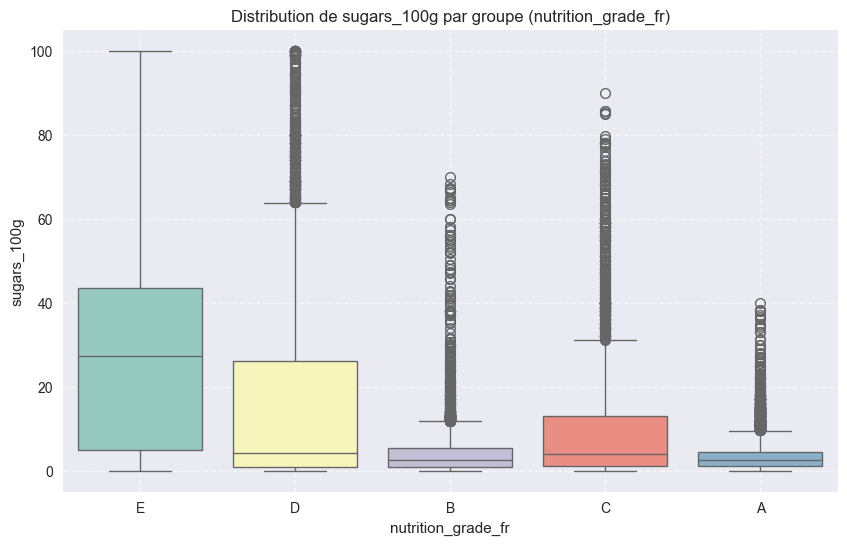

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


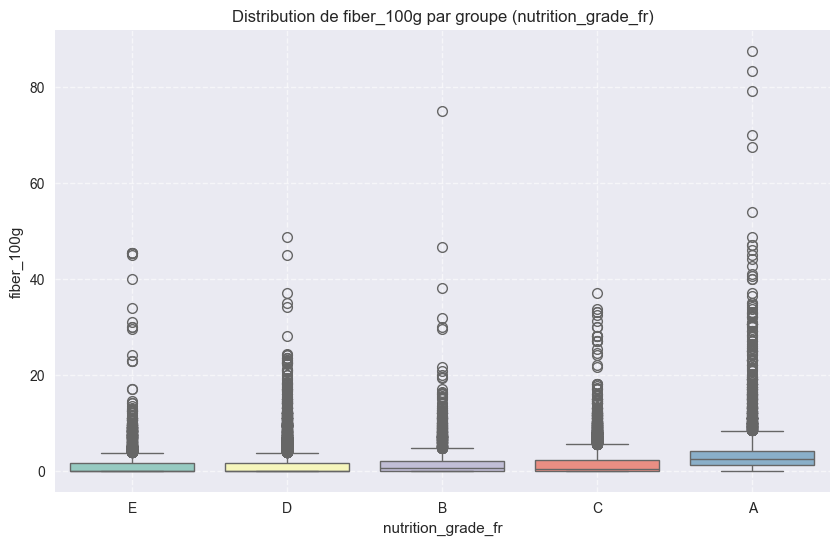

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


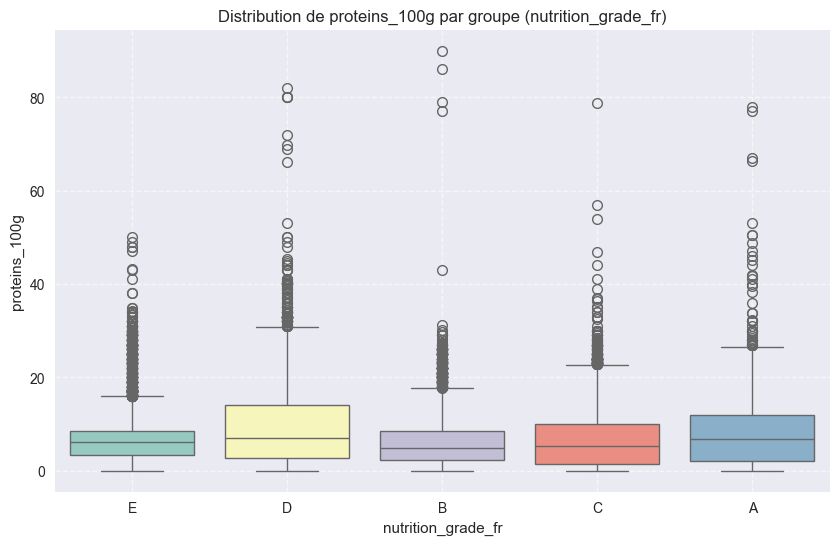

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


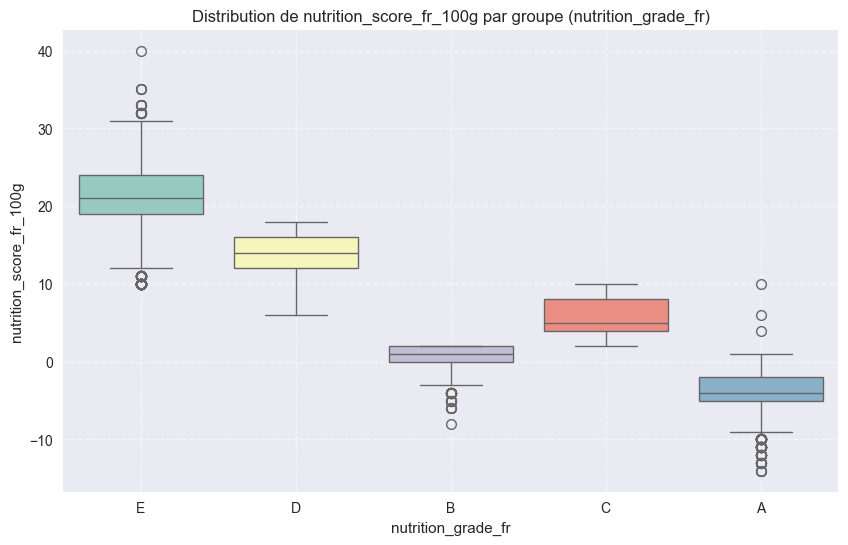

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\84316948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")


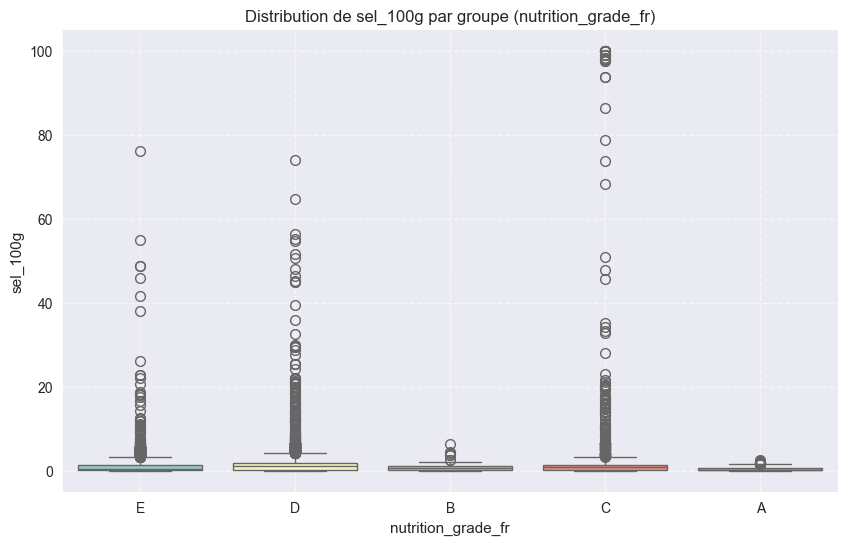

In [73]:
# Visualisation des distributions avec des box plots
for col in anova_results_sorted.keys():
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[categorical_column], y=data[col], palette="Set3")
    plt.title(f"Distribution de {col} par groupe ({categorical_column})")
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

## Relation Energy - Nutrition Grade
#### Les catégories de moins bonne qualité nutritionnelle (E, D) sont associées à des aliments plus calorifiques.
#### Les catégories de meilleure qualité nutritionnelle (A, B) contiennent des produits moins calorifiques.
#### La dispersion est plus importante pour les catégories E et D, qui incluent probablement des produits transformés très variés.
#### Les groupes B et A montrent une plus grande homogénéité dans leurs valeurs d'énergie.
#### Les outliers sont plus fréquents dans les catégories E et D, probablement en raison de la présence de produits riches en graisses ou sucres.

## Relation Nutrion Grade - Nutrition Score
#### Plus la qualité nutritionnelle (note) s'améliore (de E à A), plus le score nutritionnel diminue (indiquant une meilleure qualité nutritionnelle).
#### Les produits du groupe A sont les plus sains, avec des scores négatifs pour la majorité des produits.
#### Les groupes E et D montrent une plus grande variabilité, suggérant une diversité plus importante de produits dans ces catégories.
#### Les groupes A et B sont plus homogènes, probablement en raison de critères nutritionnels stricts.
#### Les valeurs extrêmes sont plus fréquentes dans les groupes E et D, représentant des produits très transformés ou déséquilibrés.

## ANOVA - Pnns groupe 1 / Realisation du test a but educatif

In [74]:
# Identification des groupes basés sur `pnns_groups_1`
categorical_column = "pnns_groups_1"

# Test ANOVA pour les groupes définis par `pnns_groups_1`
anova_results_pnns = {}
for col in numerical_cols:
    # Création de groupes selon les catégories
    groups = [data[data[categorical_column] == category][col].dropna()
              for category in data[categorical_column].unique() if category is not None]
    
    # Test ANOVA
    if len(groups) > 1:  # S'assurer qu'il y a plusieurs groupes
        anova = f_oneway(*groups)
        anova_results_pnns[col] = anova.pvalue

# Résultats triés par significativité (p-value)
anova_results_pnns_sorted = {k: v for k, v in sorted(anova_results_pnns.items(), key=lambda item: item[1])}
anova_results_pnns_sorted

{'energy_100g': 0.0,
 'fat_100g': 0.0,
 'saturated_fat_100g': 0.0,
 'carbohydrates_100g': 0.0,
 'sugars_100g': 0.0,
 'fiber_100g': 0.0,
 'proteins_100g': 0.0,
 'nutrition_score_fr_100g': 0.0,
 'sel_100g': 0.0}

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


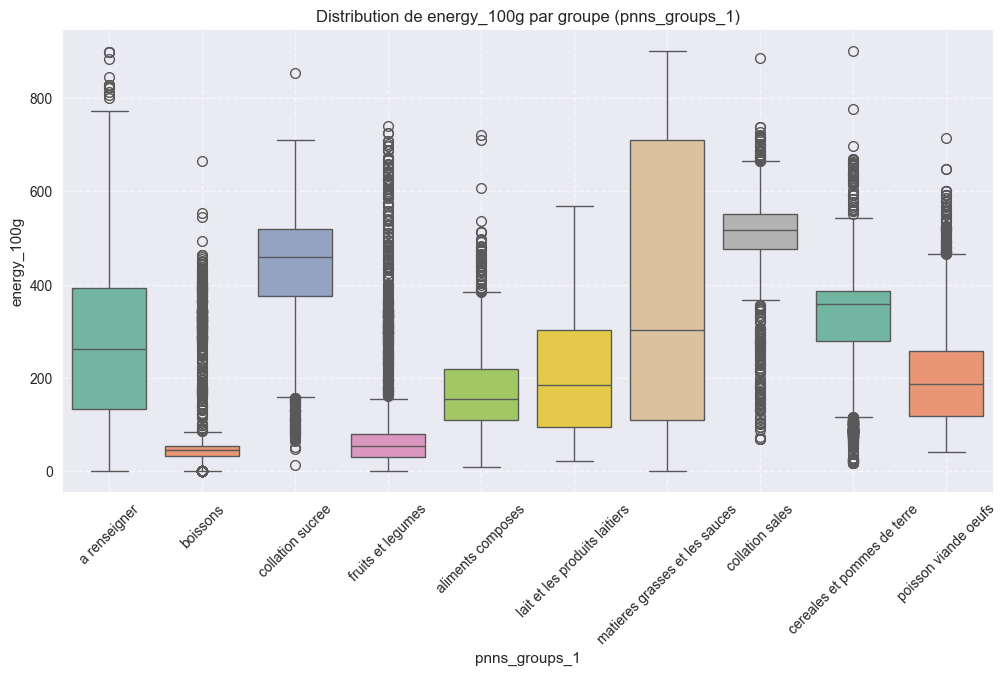

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


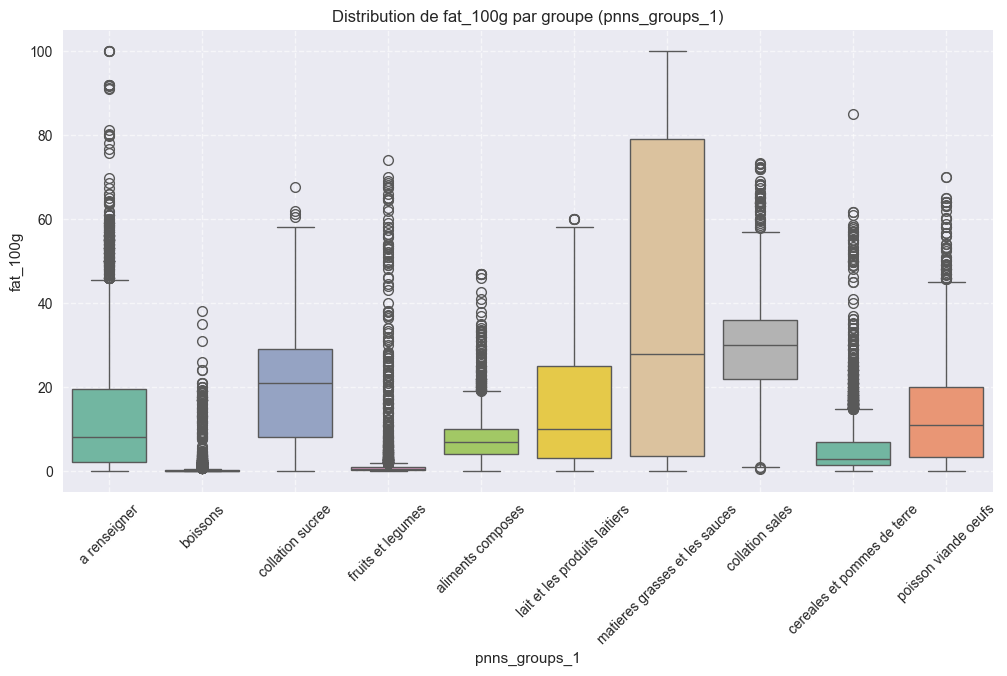

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


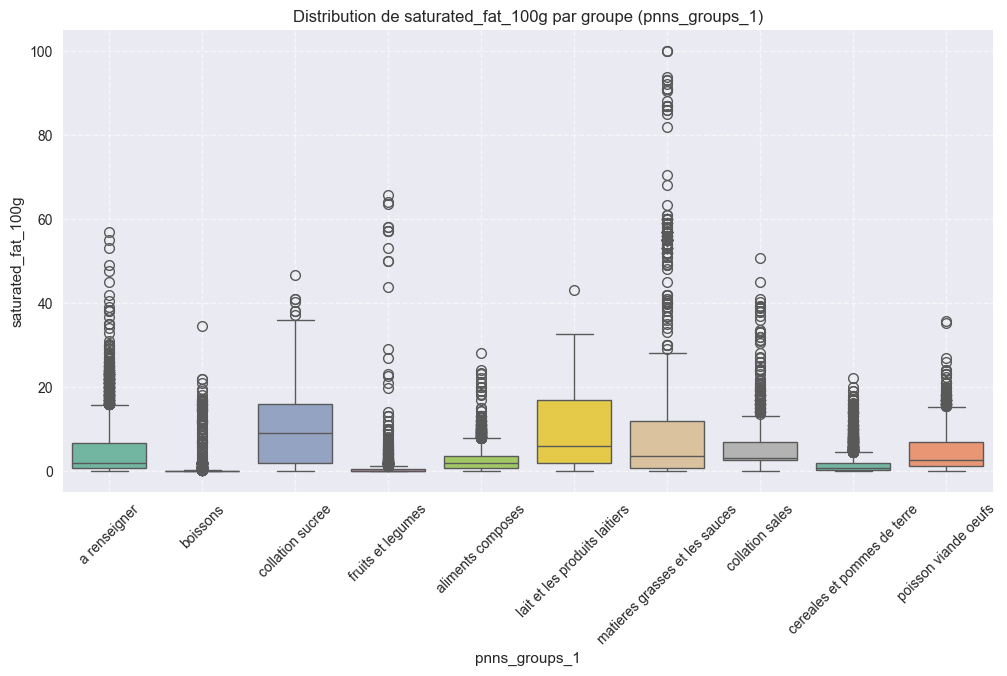

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


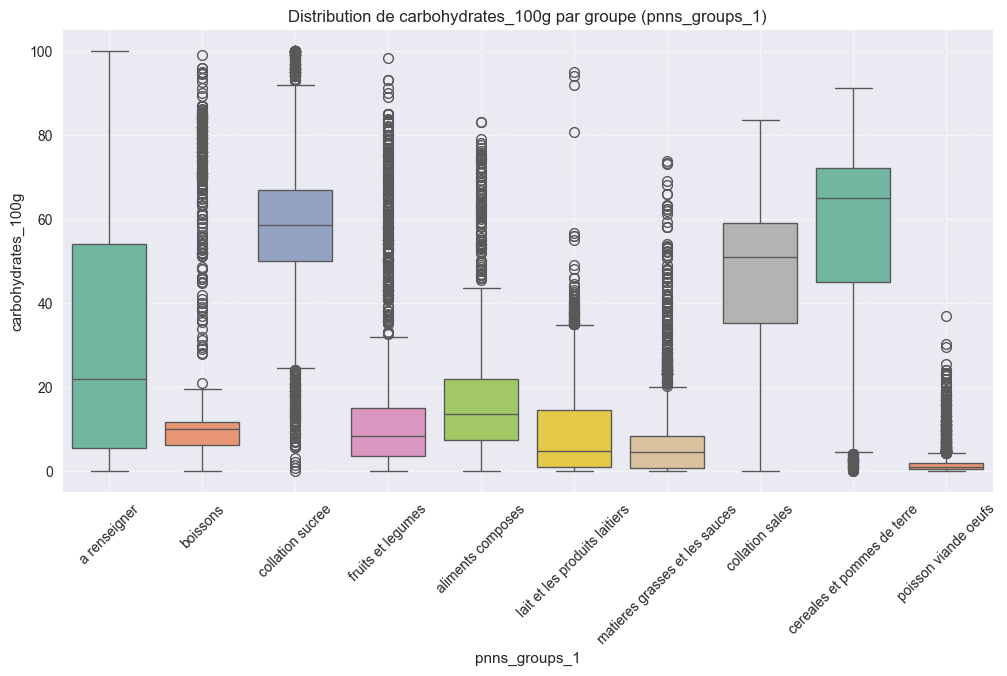

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


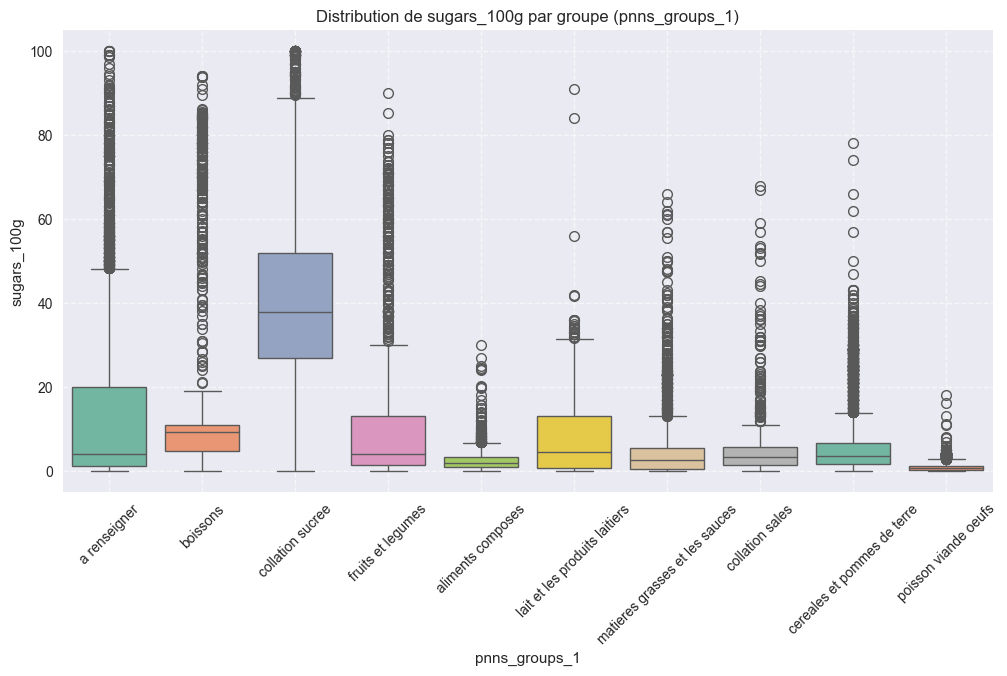

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


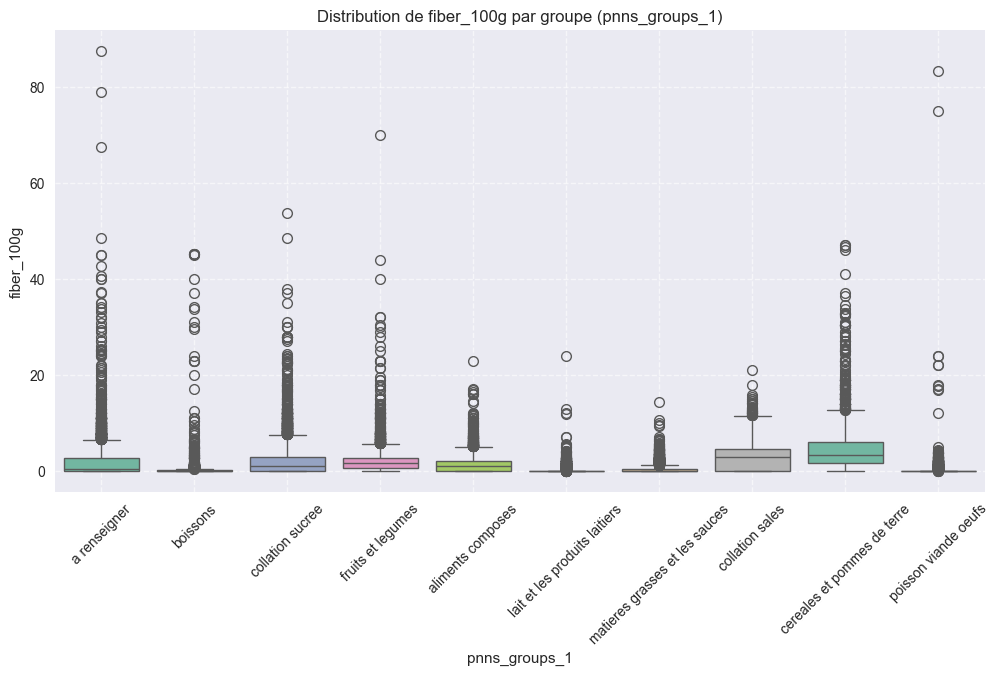

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


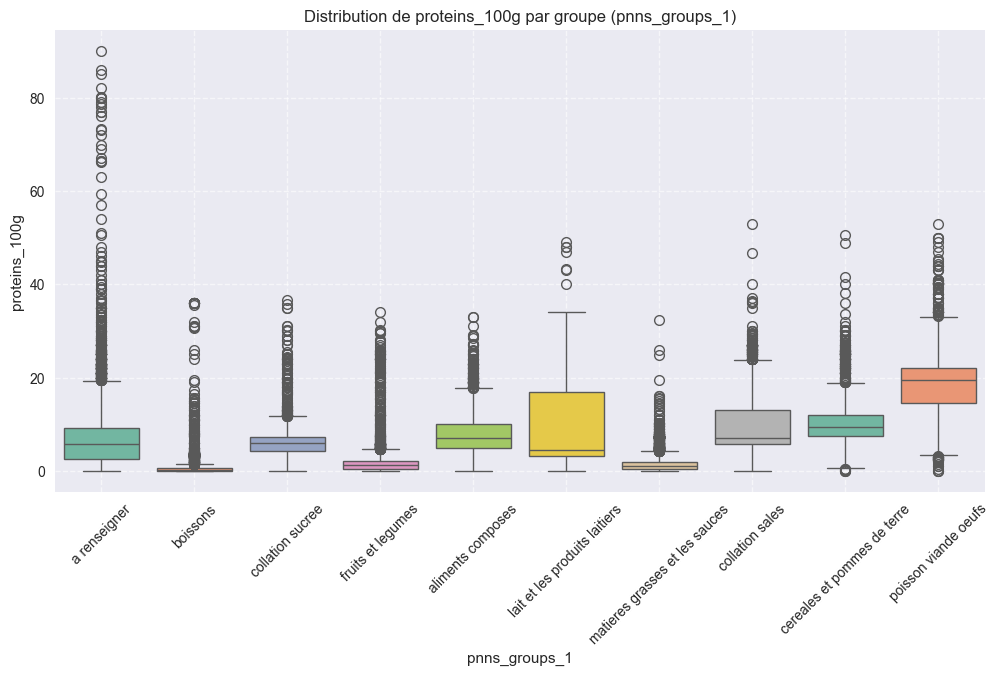

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


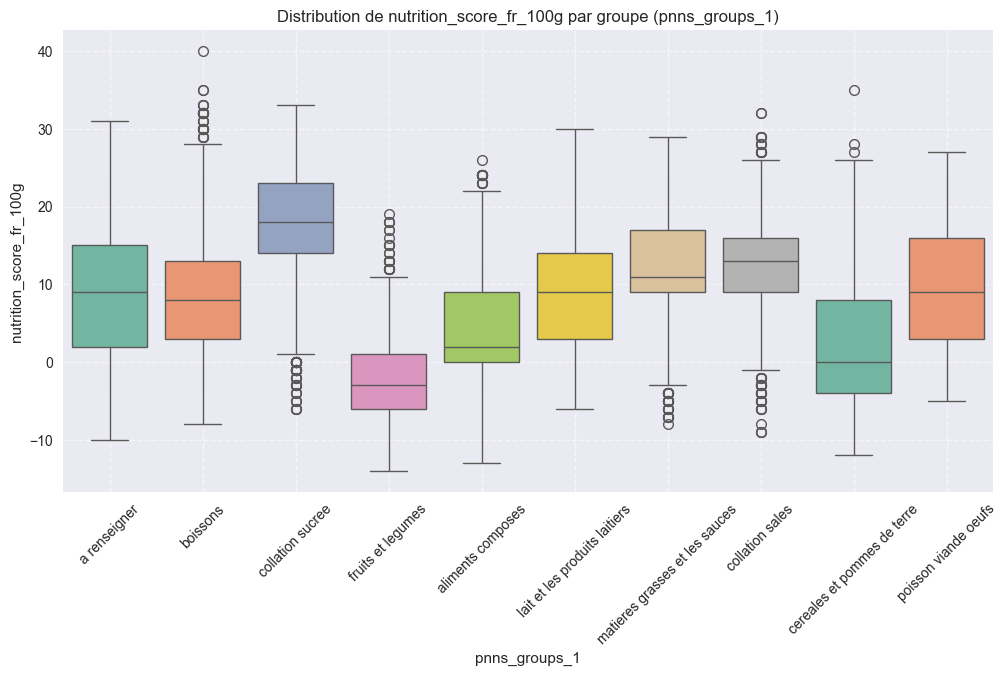

C:\Users\cosic\AppData\Local\Temp\ipykernel_13212\1198256444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")


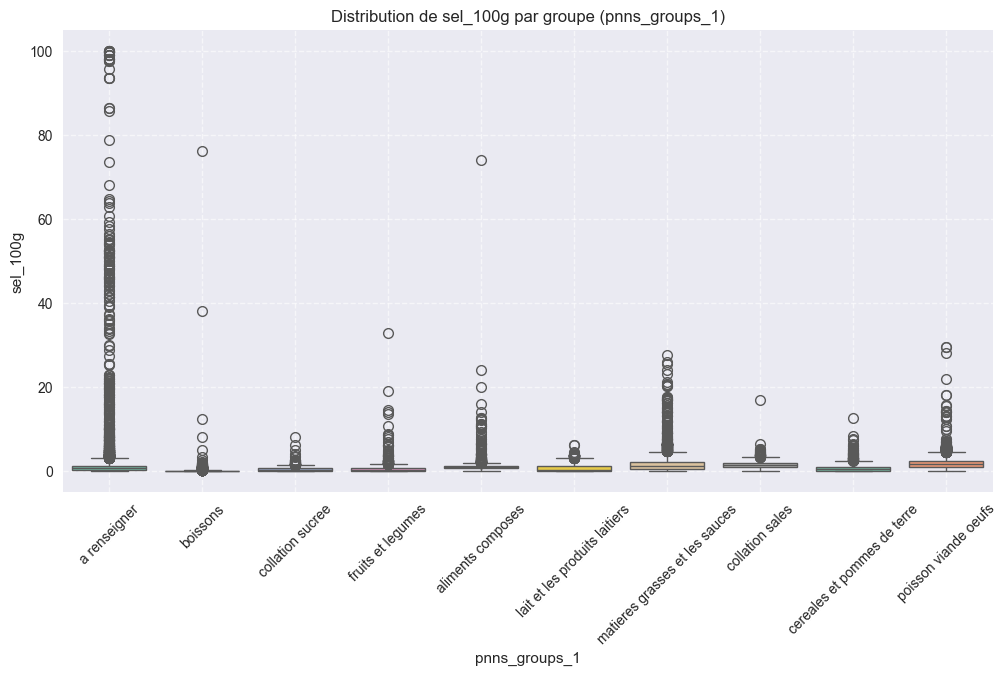

In [75]:
# Visualisation des distributions avec des box plots pour `pnns_groups_1`
for col in anova_results_pnns_sorted.keys():
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[categorical_column], y=data[col], palette="Set2")
    plt.title(f"Distribution de {col} par groupe ({categorical_column})")
    plt.xlabel(categorical_column)
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()